<a href="https://colab.research.google.com/github/Aboelsaood23/Aboelsaood23/blob/main/specilaization_1_Course_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**week 1**

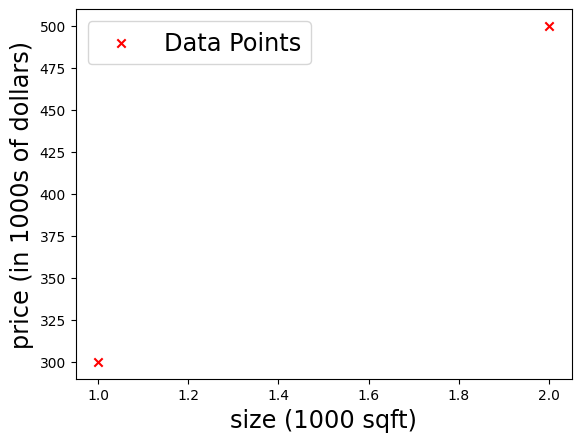

In [ ]:

# first lab neurons and layers
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense ,Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid


x_train  =np.array([[1.0],[2.0]],dtype =np.float32)
y_train  =np.array([[300.0],[500.0]],dtype =np.float32)
fig,ax =plt.subplots(1,1)
ax.scatter(x_train,y_train,marker ='x',c ='r',label ='Data Points')
ax.legend(fontsize ='xx-large')
ax.set_ylabel("price (in 1000s of dollars)",fontsize ='xx-large')
ax.set_xlabel("size (1000 sqft)",fontsize ='xx-large')
plt.show()


tf.Tensor([[-0.10645723]], shape=(1, 1), dtype=float32)
type pf a1 is :<class 'tensorflow.python.framework.ops.EagerTensor'>
w = [[-0.10645723]], b = [0.]
tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]
value of prediction_tf [[300.]
 [500.]]
value of prediction np [[300.]
 [500.]]


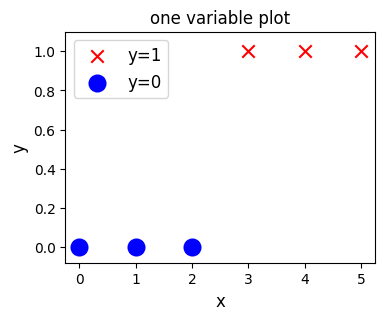

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
[[-1.68218]]
(1, 1) (1,)
[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]

 log layer 
tf.Tensor([[0.01098694]], shape=(1, 1), dtype=float32)
1/1 [==============================] - 0s 32ms/step
[[0.01098694]]
[[0.01098694]]


In [ ]:
# now let's build linear model with tensorflow an dense layer
# f_wb =w.x+b
linear_layer =tf.keras.layers.Dense(units =1,activation ='linear',)
linear_layer.get_weights() # weights are not instantiated yet
#x_train shape is (2,1), x_train[0] shape is (1,)that 1d but we need it on shape of (1,1) that 2d
a1 =linear_layer(x_train[0].reshape(1,1))
#a1 is activation vlaue g=(w.x+b) =a
print(a1)
print(f"type pf a1 is :{type(a1)}") # type is tensor
w,b =linear_layer.get_weights()
print(f"w = {w}, b = {b}") # weights are intialized to random values

#let's set the alues and apply linear regression using tensoeflow layers
set_w = np.array([[200]])
set_b = np.array([100])
linear_layer.set_weights([set_w,set_b])
a2 =linear_layer(x_train[0].reshape(1,1))
print(a2)
alin=np.dot(set_w,x_train[0].reshape(1,1))+set_b
print(alin) # it's same like Dense layer
# now let's use total data
prediction_tf =linear_layer(x_train)
prediction_np =np.dot(x_train,set_w)+set_b
print(f"value of prediction_tf {prediction_tf}")
print(f"value of prediction np {prediction_np}")
### now let's use different activaation function "sigmoid"
#let's use new dataset
x_train =np.array([0.,1,2,3,4,5],dtype=np.float32).reshape(-1,1)
y_train =np.array([0,0,0,1,1,1],dtype =np.float32).reshape(-1,1)
pos =y_train ==1
neg =y_train ==0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
              c ='blue',lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

## now let's build model using sequential structure
model =Sequential([
    tf.keras.layers.Dense(1,input_dim =1,activation ='sigmoid',name= 'L1')
])
model.summary()
logistic_layer =model.get_layer('L1')
w,b =logistic_layer.get_weights()# weights are intialized randomly
print(w,)
print(w.shape,b.shape)

# let's set values ow w , b
set_w =np.array([[2]])# it's on shape(1,1) and dimension of 2d
set_b =np.array([-4.5])
logistic_layer.set_weights([set_w,set_b])
print(logistic_layer.get_weights())

# let's use only first value of x_train to prdict first value of y_train
# as we built
print("\n log layer ")
log_out =logistic_layer(x_train[0].reshape(1,1))
print(log_out)
# you can do it on different way by providing value of x to the model and ask him about prediction
log_model_out =model.predict(x_train[0].reshape(1,1))
print(log_model_out)
log_np_out =(np.dot(set_w,x_train[0].reshape(1,1))+set_b)
def sigmoid(x):
  return 1/(1+np.exp(-x))
log_np_out =sigmoid(log_np_out)
print(log_np_out)#it's same like model built using tensor layers

In [ ]:
#keep thin in mind
x =np.array([200,17])
w =np.array([[1,-3,5],
             [-2,4,-6]])
b =np.array([-1,1,2])
print(x.shape,x.ndim)
print(w.shape,w.ndim)
print(b.shape,b.ndim)
# x shape(2,) and 1 dimesion array, it has no rows or columns
# x is not 2*1   or 1*2
# it's 1d vector wht means you can consider it column vector
g =np.dot(x,w)+b
print(g.shape,g.ndim)

(2,) 1
(2, 3) 2
(3,) 1
(3,) 1


In [ ]:
#lab_2 week_1
#cofee roasting
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# let's bbuid data from scratch
def load_coffee_data():
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))

    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))

x,y =load_coffee_data()
# check function of ploting this type of classification
# data normalization is done that fittig weights is proceed more quickly
# normalization is known as features scaling or standardization
#  Normalization, which enables us to alter the values of numerical columns in the dataset to a standard scale
#Standardization, often referred to as z-score Normalization, occasionally is a method for rescaling the values that meet the characteristics of the standard normal distribution
print(f" temperature max,min pre normalization:{np.max(x[:,0]):0.2f},{np.min(x[:,0]):0.2f}")
print(f" duration max,min pre normalization:{np.max(x[:,1]):0.2f},{np.min(x[:,1]):0.2f}")
norm_1 =tf.keras.layers.Normalization(axis=-1)
norm_1.adapt(x)# learn mean and variance of orgianl data
x_n =norm_1(x)# set mean to 0 and std =1
print(f"temperature max,min after normalization {np.max(x_n[:,0]):0.2f}, {np.min(x_n[:,0]):0.2f}")
print(f"duration max, min after normalization  {np.max(x_n[:,1]):0.2f}, {np.min(x_n[:,1]):0.2f}")

# use np.tile finction to tile data"repeat given values of arrya along specific axis "
x_t =np.tile(x_n,(1000,1))
y_t =np.tile(y,(1000,1))
print(x_t.shape,y_t.shape)

# let's build model with one hidden layer
tf.random.set_seed(1234)
model =Sequential([
    tf.keras.Input(shape=(2,)), # this shape of input data, this specify the the excepted shapa of input
    # this allow tensor flow to size the weights and bias parameters at this point
    #his statement can be omitted in practice and Tensorflow will size the network parameters when the input data is specified in the model.fit statement.
    Dense(3,activation ="sigmoid",name ='layer1'),
    Dense(1,activation ="sigmoid",name ="layer2")
])

model.summary()

# weights and biases has been insantiated by TensorFlow
#  W size should be (number of features in input, umber of units  in the layer)
# b size should match number of units on layrs
w1,b1 =model.get_layer("layer1").get_weights()
w2,b2 =model.get_layer("layer2").get_weights()
print(f"W1{w1.shape}:\n", w1, f"\nb1{b1.shape}:", b1)
print(f"W2{w1.shape}:\n", w1, f"\nb2{b2.shape}:", b2)
# now let's compile model ,define loss function and optimization
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer =tf.keras.optimizers.Adam(learning_rate=0.01)
)
#model.fit , to run gradiant descent and fit weights to data
model.fit(x_t,y_t,epochs=10)

 temperature max,min pre normalization:284.99,151.32
 duration max,min pre normalization:15.45,11.51
temperature max,min after normalization 1.66, -1.69
duration max, min after normalization  1.79, -1.70
(200000, 2) (200000, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
W1(2, 3):
 [[-0.5381772   0.12381887 -0.90998906]
 [ 0.50196946  0.54725504  0.07913172]] 
b1(3,): [0. 0. 0.]
W2(2, 3):
 [[-0.5381772   0.12381887 -0.90998906]
 [ 0.50196946  0.54725504  0

In [ ]:
# now let's check updated weights
w1,b1 =model.get_layer("layer1").get_weights()
w2,b2 =model.get_layer("layer2").get_weights()
print(f"W1{w1.shape}:\n", w1, f"\nb1{b1.shape}:", b1)
print(f"W2{w1.shape}:\n", w1, f"\nb2{b2.shape}:", b2)

# now we will choose two exmplples example and make predicions,
x_test =np.array([[200,13.9],# this suppose to be psotive value
                  [200,17]]) # this suppose to be negative value
x_testn = norm_1(x_test)
prediction = model.predict(x_testn)
print("predictions =\n",prediction)
#epochs number is x : that means the entire dataset should be applied during trasining x times
# on each iteration the entire datset is divided into batchs
# now let's make an array to save predictions on it

yhat = np.zeros_like(prediction)
for i in range(len(prediction)):
    if prediction[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

W1(2, 3):
 [[-10.599411    15.063259     0.12807311]
 [ -0.30131662  12.469795    10.728764  ]] 
b1(3,): [-11.375131    2.0926535  12.96841  ]
W2(2, 3):
 [[-10.599411    15.063259     0.12807311]
 [ -0.30131662  12.469795    10.728764  ]] 
b2(1,): [-12.711533]
1/1 [==============================] - 0s 51ms/step
predictions =
 [[9.9170417e-01]
 [7.5105692e-07]]
decisions = 
[[1.]
 [0.]]


In [ ]:
# lab 3
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
x,y =load_coffee_data()
# check function of ploting this type of classification
# data normalization is done that fittig weights is proceed more quickly
# normalization is known as features scaling or standardization
#  Normalization, which enables us to alter the values of numerical columns in the dataset to a standard scale
#Standardization, often referred to as z-score Normalization, occasionally is a method for rescaling the values that meet the characteristics of the standard normal distribution
print(f" temperature max,min pre normalization:{np.max(x[:,0]):0.2f},{np.min(x[:,0]):0.2f}")
print(f" duration max,min pre normalization:{np.max(x[:,1]):0.2f},{np.min(x[:,1]):0.2f}")
norm_1 =tf.keras.layers.Normalization(axis=-1)
norm_1.adapt(x)# learn mean and variance of orgianl data
x_n =norm_1(x)# set mean to 0 and std =1
print(f"temperature max,min after normalization {np.max(x_n[:,0]):0.2f}, {np.min(x_n[:,0]):0.2f}")
print(f"duration max, min after normalization  {np.max(x_n[:,1]):0.2f}, {np.min(x_n[:,1]):0.2f}")

print("\n Scratch model results")
# now we will build neural network layer from scractch,it contain two layers with sigmoid functions
def dense (a_in,w,b,g): #g is activation function
  units =w.shape[1]
  a_out =np.zeros(units)
  for j in range(units):
    w_j = w[:,j]  # to get corrssponding parameter
    z =np.dot(w_j,a_in)+b[j]
    a_out[j] = g(z)
  return a_out

#now a re going to build the model it self
# it's function that call two other functions inside it
def my_sequential(x,w1,b1,w2,b2):
  a1 =dense(x,w1,b1,sigmoid)
  a2 =dense(a1,w2,b2,sigmoid) # notice that we are here passed a1 as input to second function
  return (a2)

#now let's check the model
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

# now we will build function fo model.predict
def my_predict(x,w1,b1,w2,b2):
  m =x.shape[0]
  p =np.zeros((m,1))
  for i in range(m):
    p[i,0]= my_sequential(x[i],w1,b1,w2,b2)
  return (p)

# let's check model we have built ,
x_test =np.array([[200,13.9],# this suppose to be psotive value
                  [200,17]]) # this suppose to be negative value
x_testn = norm_1(x_test)
prediction = my_predict(x_testn,W1_tmp, b1_tmp, W2_tmp, b2_tmp)
print("predictions =\n",prediction)


#let's check values of prediction
yhat = np.zeros_like(prediction)
for i in range(len(prediction)):
    if prediction[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

 temperature max,min pre normalization:284.99,151.32
 duration max,min pre normalization:15.45,11.51
temperature max,min after normalization 1.66, -1.69
duration max, min after normalization  1.79, -1.70

 Scratch model results
predictions =
 [[9.71932288e-01]
 [3.28978626e-08]]
decisions = 
[[1.]
 [0.]]


Mounted at /content/drive
first element of y is 0
last element of y is 1


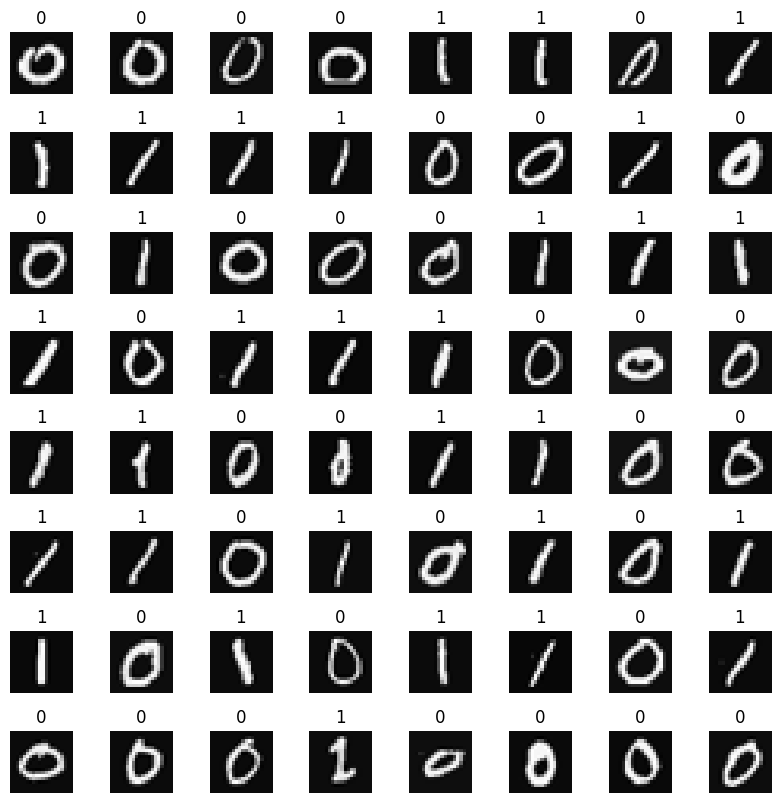

In [ ]:
#final assignmwnet of week 1
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


# we will use neural networks to recognize two handwrittern digits,zeros and ones
# dataset  contain 1000 training examples
#each training example 20*20,each image is unrolled to be 400 pixesl by concatenating each row
# so each training example now is just row on dataset , that gives 1000*400 matrix
# we will not load the full dataset
# let's connect to google drive as our data is saved there
from google.colab import drive
drive.mount('/content/drive')
#data is saved on numpy array format
#let's create function to load the data
def load_data():
  x =np.load("/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/X.npy")
  y =np.load("/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/y.npy")
  x =x[0:1000]
  y =y[0:1000]
  return x,y

x,y =load_data()
#print("first elemnet of x is :",x[0])
print("first element of y is",y[0,0])
print("last element of y is",y[-1,0])
x.shape,y.shape
## let's plot some values of x to see visuals
m,n =x.shape
fig,axes =plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad =0.1)  # to prevent overlapping

for i,ax in enumerate(axes.flat) :
  random_index =np.random.randint(m)
  x_random_reshaped =x[random_index].reshape((20,20)).T
  ax.imshow(x_random_reshaped,cmap ='gray')
  ax.set_title(y[random_index,0])
  ax.set_axis_off()


Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 25)                10025     
                                                                 
 dense_2 (Dense)             (None, 15)                390       
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10431 (40.75 KB)
Trainable params: 10431 (40.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
parameters 1 = 10025 parmeteres 2= 540 Parameters 3= 16
 w1 shapw = (400, 25), b1 shape = (25,)
 w2 shape = (25, 15), b2 shape = (15,)
 w3 shape = (15, 1), b3 shape = (1,)
[<tf.Variable 'dense_3/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[-0.00427097],
       [-0.52506125],
 

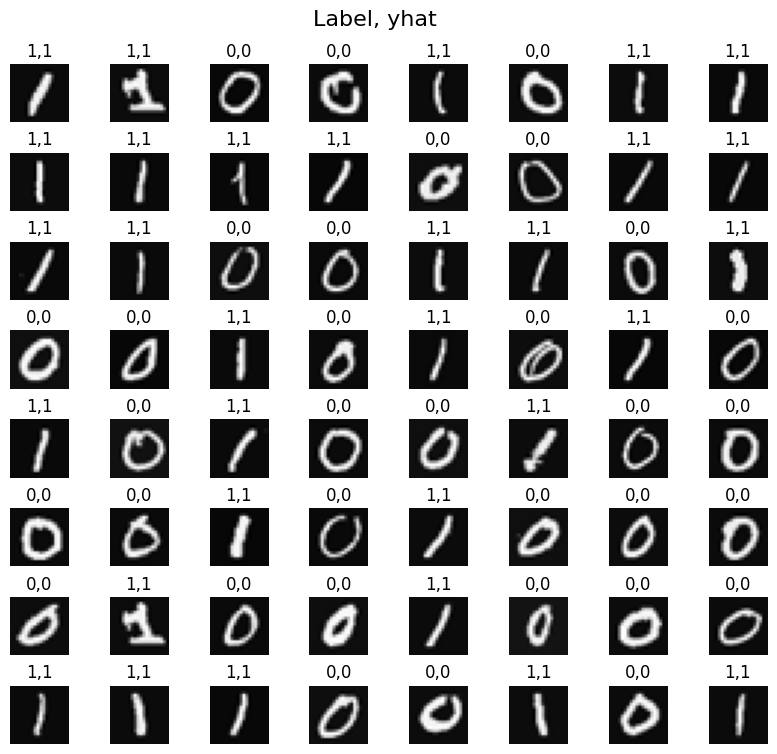

In [ ]:

# note this data is only zeros and ones
# we will create neural network , three dense layers with sigmoid activation fucntion, input is 20*20 images
# our mdoel will have 25 unit on layer 1 and 15 unit on layer 2  and 1 unit on output layer
# w1 will be in shape (400,25) and b1 (25,)
# w2 will be in shape (25,15) and b2 (15,)
# w3 will be in shape(15,1)  and b3 (1,)
model =Sequential([
    tf.keras.Input(shape=(400,)), # spicify input shape, tf can do it automaticallty, it's shape of one image
    tf.keras.layers.Dense(25,activation="sigmoid"),
    tf.keras.layers.Dense(15,activation="sigmoid"),
    tf.keras.layers.Dense(1,activation="sigmoid")
],name ='my_model' )

model.summary()

# numrer pf parameters
L1_num_parameters =400*25+25
L2_unm_parameters=35*15+15
L3_num_parameters=15*1+1
print("parameters 1 =",L1_num_parameters,"parmeteres 2=",L2_unm_parameters,"Parameters 3=",L3_num_parameters)
[layer1,layer2,layer3] =model.layers
w1,b1 =layer1.get_weights()
w2,b2 =layer2.get_weights()
w3,b3 =layer3.get_weights()
print(f" w1 shapw = {w1.shape}, b1 shape = {b1.shape}")
print(f" w2 shape = {w2.shape}, b2 shape = {b2.shape}")
print(f" w3 shape = {w3.shape}, b3 shape = {b3.shape}")
print(model.layers[2].weights)
#print(model.layers[1].weights) # there is many parameters here
# now let's compile the model
model.compile(
    loss =tf.keras.losses.BinaryCrossentropy(),
    optimizer =tf.keras.optimizers.Adam(0.001)
)
model.fit(
    x,y,epochs=20
)

#let's do prediction
prediction =model.predict(x[0].reshape(1,400)) # total data on sahpe (1000,400) as batchs
# so if your going to padd data to mdoel it should be on batchs form event it's one image
print(f"prediction a zero :{prediction}")
prediction =model.predict(x[500].reshape(1,400))
print(f" prediction of one :{prediction}")
# note that the mdoel is trying to predict probablity that output is one ,if probability is high then it's one,
# of probability is low then value is not one

#let's plot model prediction


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
m, n = x.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model.predict(x[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0

    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

In [ ]:
# victorized numpy model
#check this part , it's too important

#**Week2**

In [ ]:
# relu activation lab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.activations import linear, relu, sigmoid
from matplotlib.widgets import Slider
from sklearn.datasets import make_blobs
# efine softmax function
def my_softmax(z):
  ez =np.exp(z) # this one is elemwnt wise what it means z is vecctor and this operation is done seperatly foe each element
  sm =ez/np.sum(ez) # this one is vector too
  return (sm)
# wht happens then that we take each value of the vector of sum and take negative log to it, that's probablity of each vaue, this output of loss function
# the cost function is total of loss fucntion



# make  dataset for example
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
x_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)
model =Sequential([
    Dense(25,activation ='relu'),
    Dense(15,activation ='relu'),
    Dense(4,activation ='softmax')
])

model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer =tf.keras.optimizers.Adam(0.001)
)

model.fit(
    x_train,y_train,epochs =10
)

predicted =model.predict(x_train)

print(predicted[:2])
print("largest values",np.max(predicted),"smallest values",np.min(predicted))

Epoch 1/10
63/63 [==============================] - 1s 2ms/step - loss: 1.0398
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 0.4873
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.2179
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1142
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0779
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0612
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0523
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0466
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0422
Epoch 10/10
63/63 [==============================] - 0s 2ms/step
[[5.1210611e-04 9.9804625e-04 9.8177260e-01 1.6717078e-02]
 [9.9150980e-01 6.6097183e-03 1.5103716e-03 3.7015349e-04]]
largest values 0.9999998 smallest values 7.330723e-10


In [ ]:
# now let's try predicted prefred where model ecxute loss function using origianal term
# we do this by adding term of from_logits =True
perfect_model =Sequential([
    Dense(25,activation ='relu'),
    Dense(15,activation ='relu'),
    Dense(4,activation ='linear')
])
perfect_model.compile(
    loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits =True),
    optimizer =tf.keras.optimizers.Adam(0.001)
)
perfect_model.fit(
    x_train,y_train,epochs=10
)

perfect_predicted =perfect_model.predict(x_train)
print(f"two examples output vector:\n{perfect_predicted[:2]}")
print("larget value",np.max(perfect_predicted),"smallest value",np.min(perfect_predicted))
#note here output results are not probabilties

# now we will apply softmax function to prediced output, what means wern't going to run the model again just apply softmax on predicted values
soft_perfect_predicted =tf.nn.softmax(perfect_predicted).numpy()
print(f"two exmples of output vector {soft_perfect_predicted[:2]}")
print("largest values",np.max(soft_perfect_predicted),"smallest value",np.min(soft_perfect_predicted))
# notice that : predicted values now are probabilities

#difference between sparsecategoricalcrossentropy and categoricalcrossentropy
#SparseCategorialCrossentropy: expects the target to be an integer corresponding to the index. For example, if there are 10 potential target values, y would be between 0 and 9.
#ategoricalCrossEntropy: Expects the target value of an example to be one-hot encoded where the value at the target index is 1 while the other N-1 entries are zero. An example with 10 potential target values, where the target is 2 would be [0,0,1,0,0,0,0,0,0,0].


Epoch 1/10
63/63 [==============================] - 1s 4ms/step - loss: 1.2452
Epoch 2/10
63/63 [==============================] - 0s 5ms/step - loss: 0.5073
Epoch 3/10
63/63 [==============================] - 0s 6ms/step - loss: 0.2559
Epoch 4/10
63/63 [==============================] - 0s 4ms/step - loss: 0.1467
Epoch 5/10
63/63 [==============================] - 0s 3ms/step - loss: 0.1012
Epoch 6/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0786
Epoch 7/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0665
Epoch 8/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0593
Epoch 9/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0538
Epoch 10/10
63/63 [==============================] - 0s 2ms/step
two examples output vector:
[[-1.4726051 -2.9049287  3.749768  -0.6248853]
 [ 5.7164326  1.1159863 -2.0859644 -3.4541304]]
larget value 12.766001 smallest value -9.063216
two exmples of output vector [[5.2924994e-03 1.263603

In [ ]:
#multiclassification lab
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
x_train ,y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {x_train.shape}, shape of y_train: {y_train.shape}")

# very important point check it "While it is possible to include the softmax in the output layer, it is more numerically stable if linear outputs are passed to the loss function during training. If the model is used to predict probabilities, the softmax can be applied at that point."
tf.random.set_seed(1234)
model=Sequential([

                  Dense(25,activation='relu',name ='L1'),
                  Dense(4,activation='linear',name='L2')
])
model.compile(
    loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits =True),
    optimizer =tf.keras.optimizers.Adam(0.01)
)

model.fit(x_train,y_train,epochs=100)






unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)
Epoch 1/100
4/4 [==============================] - 1s 15ms/step - loss: 1.5808
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.9115
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.5865
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.4226
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.3009
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.2240
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 0.1694
Epoch 8/100
4/4 [==============================] - 0s 11ms/step - loss: 0.1290
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1027
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0831
Epoch 11/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0695
Epoch 12/100
4

#**week 3**



Mounted at /content/drive
the shape of inputs x is :(50, 1)
the shape of targets y is :(50, 1)


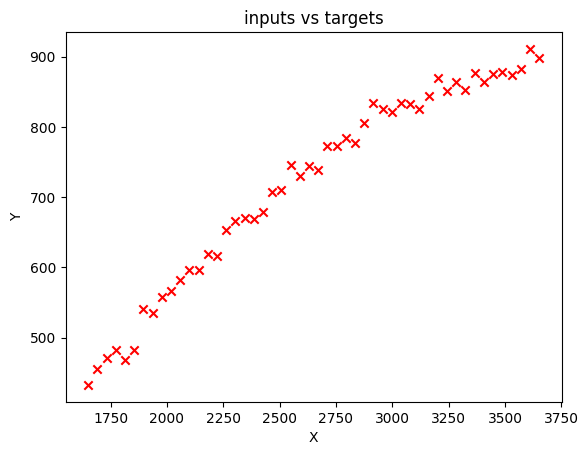

 shape of training set input is (30, 1)
 shape of trainig set (target) is (30, 1)

 shape of cross validation set (input) is (10, 1)
 shape of cross validation set (target) is (10, 1)

 shape of test set (input) is :(10, 1)
shape of test set is (target) is: (10, 1)


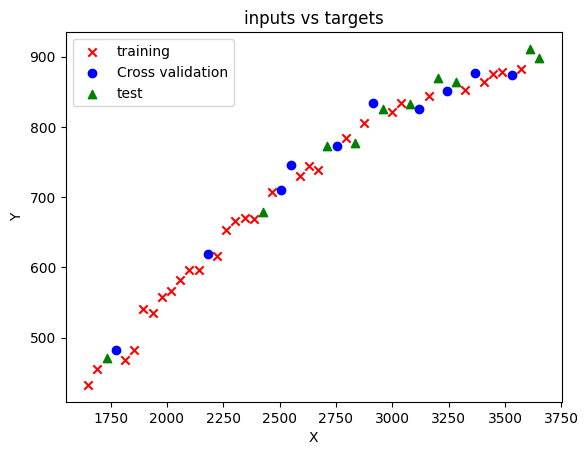

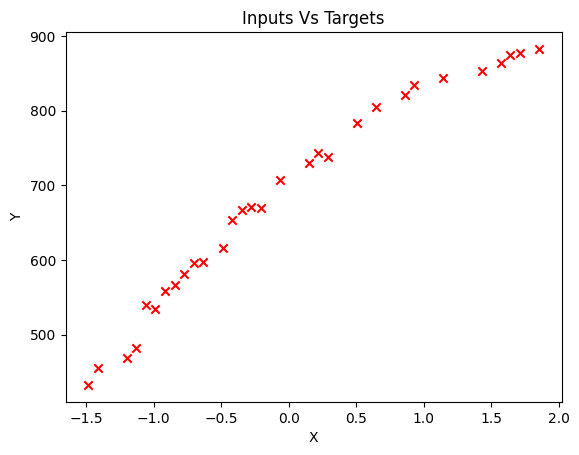

 training MSE (use sklearn function):406.19374192533155
Cross Validation MSE: 551.7789026952216
[[ 1.42715997  1.47236856]
 [-0.27691164 -0.36461881]
 [ 1.71117191  1.84025141]
 [ 0.22010925  0.1055935 ]
 [ 0.14910627  0.03511397]]
Training mapped MSE :49.111609334025154
Cross validation mapped MSE : 87.6984121111191


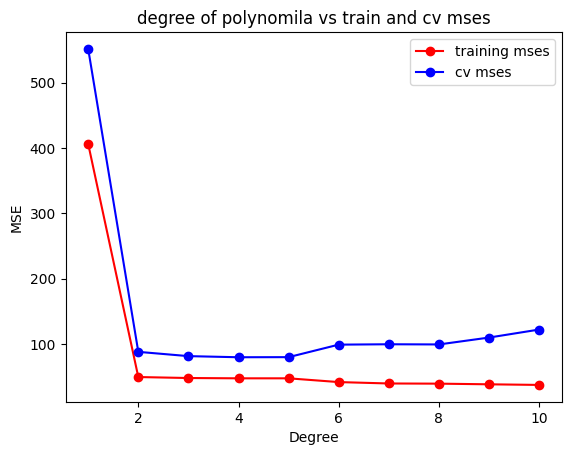

In [1]:
import numpy as np

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

data =np.loadtxt("/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/data_w3_ex1.csv",delimiter=',')

x =data[:,0]
y =data[:,1]

x =np.expand_dims(x,axis =1)
y =np.expand_dims(y,axis=1)

print(f"the shape of inputs x is :{x.shape}")
print(f"the shape of targets y is :{y.shape}")

#elt's plot this data
plt.scatter(x,y,marker='x',c ='r')
plt.title("inputs vs targets")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#now we will split the data usinf trains_test_split function
# we will divide it into 3 parts
x_train,x_,y_train,y_ =train_test_split(x,y,test_size =0.40,random_state=1)
#f you set the random_state to a particular number, you will get the same split every time you run the code, assuming the data and other parameters remain constant.
x_cv,x_test,y_cv,y_test = train_test_split(x_,y_,test_size=0.50,random_state=1)
del x_,y_

print(f" shape of training set input is {x_train.shape}")
print(f" shape of trainig set (target) is {y_train.shape}\n")
print(f" shape of cross validation set (input) is {x_cv.shape}")
print(f" shape of cross validation set (target) is {y_cv.shape}\n")
print(f" shape of test set (input) is :{x_test.shape}")
print(f"shape of test set is (target) is: {y_test.shape}")

# elt'splot this new splited data
plt.scatter(x_train,y_train,marker='x',c ='r',label="training")
plt.scatter(x_cv,y_cv,marker='o',c ='b',label="Cross validation")
plt.scatter(x_test,y_test,marker='^',c ='g',label="test")
plt.title("inputs vs targets")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#let's do feature scaling
# standard scaling is making mean = 0, and standrad deviation = 1
scaler_linear =StandardScaler()
x_trained_scaled =scaler_linear.fit_transform(x_train)

plt.scatter(x_trained_scaled,y_train,marker='x',c ='r')
plt.title("Scaled Input Vs Target")
plt.title("Inputs Vs Targets")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
# now let's train linear model

linear_model =LinearRegression()
linear_model.fit(x_trained_scaled,y_train)

#o evaluate the performance of your model, you will want to measure the error for the training and cross validation sets
# we will use maen squared errror but we will use built in function on linear model
yhat =linear_model.predict(x_trained_scaled)
print(f" training MSE (use sklearn function):{mean_squared_error(y_train,yhat)/2}") # we used only 2 not 2*m becaus mean means it's divided laready and this 2 is just for drevative
#'s important to apply the same scaling transformation to your validation set and test set. This ensures that your data remains on a consistent scale across all sets, and the model is trained and evaluated on comparable input.
x_cv_scaled=scaler_linear.transform(x_cv)
yhat =linear_model.predict(x_cv_scaled)
print(f"Cross Validation MSE: {mean_squared_error(y_cv,yhat)/2}")

# now let's add polynomial features
poly =PolynomialFeatures(degree =2,include_bias =False)
x_trained_mapped =poly.fit_transform(x_train)
scaler_poly =StandardScaler()
x_trained_mapped_scaled =scaler_poly.fit_transform(x_trained_mapped)
print(x_trained_mapped_scaled[:5])
#let's build model
model =LinearRegression()
model.fit(x_trained_mapped_scaled,y_train)
yhat =model.predict(x_trained_mapped_scaled)
print(f"Training mapped MSE :{mean_squared_error(y_train,yhat)/2}")

#  do the same for validation data
x_cv_mapped =poly.transform(x_cv)
x_cv_mapped_scaled = scaler_poly.transform(x_cv_mapped)
yhat =model.predict(x_cv_mapped_scaled)
print(f"Cross validation mapped MSE : {mean_squared_error(y_cv,yhat)/2}")

# to know which ploynimail degree is better let's do it many values
train_mses =[]
cv_mses =[]
models =[]
scalers =[]

for degree in range(1,11):
    #add polynomial featrues and scale the training set
  poly =PolynomialFeatures(degree,include_bias=False)
  x_train_mapped =poly.fit_transform(x_train)
  scaler_poly =StandardScaler()
  x_train_mapped_scaled =scaler_poly.fit_transform(x_train_mapped)
  scalers.append(scaler_poly)
  #create and train model
  model =LinearRegression()
  model.fit(x_train_mapped_scaled,y_train)
  models.append(model)
  #compute training set MSE
  yhat =model.predict(x_train_mapped_scaled)
  train_mse =mean_squared_error(y_train,yhat)/2
  train_mses.append(train_mse)
  # add polynomial featrues and scale to cross validation set
  poly =PolynomialFeatures(degree,include_bias =False)
  x_cv_mapped =poly.fit_transform(x_cv)
  x_cv_mapped_scaled =scaler_poly.transform(x_cv_mapped)
  # compute cross validation mse directly using same model
  yhat = model.predict(x_cv_mapped_scaled)
  cv_mse =mean_squared_error(y_cv,yhat)/2
  cv_mses.append(cv_mse)


degree =range(1,11) # to use it on x-axis

plt.plot(degree,train_mses,marker='o',c ='r',label ='training mses')
plt.plot(degree,cv_mses,marker='o',c='b',label ='cv mses')
plt.title("degree of polynomila vs train and cv mses")
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.legend()
plt.show()




In [2]:
# choose lowest model values
degree = np.argmin(cv_mses)+1 # count of list starts from zeros
print(f"Lowest CV MSE is found ={degree} ")
# now that mse values of training set and validation set is not perfect to preform model
# actaully test set value of mse is the one that represent the model
# we need to do same transformation on test sataset
poly =PolynomialFeatures(4,include_bias =False)
x_train_mapped =poly.fit_transform(x_train)
scaler =StandardScaler()
x_train_mapped_scaled =scaler.fit_transform(x_train_mapped)
model =LinearRegression()
model.fit(x_train_mapped_scaled,y_train)
yhat_1 =model.predict(x_train_mapped_scaled)
train_mse =mean_squared_error(y_train,yhat_1)/2
print(f"values of mse of training dataset on degree 4 is : {train_mse}")
#do same on cross validation dataset
x_cv_mapped =poly.fit_transform(x_cv)
x_cv_mapped_scaled =scaler.transform(x_cv_mapped)
yhat_2 =model.predict(x_cv_mapped_scaled)
cross_validation_mse =mean_squared_error(y_cv,yhat_2)/2
print(f" cross validation error when degree is 4 : {cross_validation_mse}")
# let's apply same transformation on test set
x_test_mapped =poly.fit_transform(x_test)
x_test_mapped_scaled =scaler.transform(x_test_mapped)
yhat_3 =model.predict(x_test_mapped_scaled)
test_set_mse =mean_squared_error(y_test,yhat_3)/2
print(f" test set mse when degree is 4 = {test_set_mse}")
#apply to same model we created

Lowest CV MSE is found =4 
values of mse of training dataset on degree 4 is : 47.146466442636395
 cross validation error when degree is 4 : 79.43134912070502
 test set mse when degree is 4 = 104.6316820528975


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense ,Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

#same choosing neural model selection process will be used
# neural networks can handle nonlinear relationships, so we don't need to add polynomial features
#but we will have code in case we wanted to make sure of it

degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
x_train_mapped = poly.fit_transform(x_train)
x_cv_mapped = poly.transform(x_cv)
x_test_mapped = poly.transform(x_test)

# now let's scale features, it's like scaling original data as it's still degree one so nothing changed
scaler =StandardScaler()
x_train_mapped_scaled =scaler.fit_transform(x_train_mapped)
x_cv_mapped_scaled =scaler.transform(x_cv_mapped)
x_test_mapped_scaled =scaler.transform(x_test_mapped)


In [4]:

# we will create three model
tf.random.set_seed(20)
model_1 =Sequential([
    Dense(25,activation ='relu'),
    Dense(15,activation ='relu'),
    Dense(1, activation ='linear')
],name ='model_1'
                    )
model_2 =Sequential([
    Dense(20,activation ='relu'),
    Dense(12,activation ='relu'),
    Dense(12,activation ='relu'),
    Dense(20,activation ='relu'),
    Dense(1, activation ='linear')
], name ='model_2')
model_3 =Sequential([
    Dense(32,activation ='relu'),
    Dense(16,activation ='relu'),
    Dense(8, activation ='relu'),
    Dense(4, activation ='relu'),
    Dense(12,activation ='relu'),
    Dense(1, activation ='linear')
],name ='model_3')

model_list =[model_1,model_2,model_3]

#list to save values of mse for each model
nn_train_mses=[]
nn_cv_mses=[]

nn_models = model_list

for model in nn_models:
  model.compile(
      loss='mse',
      optimizer =tf.keras.optimizers.Adam(learning_rate=0.2)
  )
  print(f"training {model.name}...")
  model.fit(
      x_train_mapped_scaled,y_train,
      epochs =300,
      verbose =0
  )
  print("Done\n")
  #record trainifg mses
  yhat =model.predict(x_train_mapped_scaled)
  train_mse = mean_squared_error(y_train,yhat)/2
  nn_train_mses.append(train_mse)
  #record cross calidation  mses
  yhat_2 = model.predict(x_cv_mapped_scaled)
  cv_mse =mean_squared_error(y_cv,yhat_2)/2
  nn_cv_mses.append(cv_mse)

print("RESULTS :")
for model_num in range(len(nn_train_mses)):
  print(
      f"model {model_num+1}: Training MSE :{nn_train_mses[model_num]:.2f},"+
      f"cv MSE: {nn_cv_mses[model_num]:.2f}"
  )


training model_1...
Done

1/1 [==============================] - 0s 14ms/step
training model_2...
Done

1/1 [==============================] - 0s 17ms/step
training model_3...
Done

1/1 [==============================] - 0s 17ms/step
RESULTS :
model 1: Training MSE :73.40,cv MSE: 112.28
model 2: Training MSE :75.39,cv MSE: 98.90
model 3: Training MSE :75.13,cv MSE: 114.23


In [5]:
# best model is model 3
model_num =3
yhat =nn_models[model_num-1].predict(x_test_mapped_scaled)
test_mse =mean_squared_error(y_test,yhat)/2
print(f"Selected Model :{model_num}")
print(f"Training mse :{nn_train_mses[model_num-1]:.2f}")
print(f"Cross validation MSE :{nn_cv_mses[model_num-1]:.2f}")
print(f"test MSE :{test_mse:.2f}")

1/1 [==============================] - 0s 15ms/step
Selected Model :3
Training mse :75.13
Cross validation MSE :114.23
test MSE :124.74


the shape of inputs x is (200, 2)
the shape of outputs y is (200, 1)


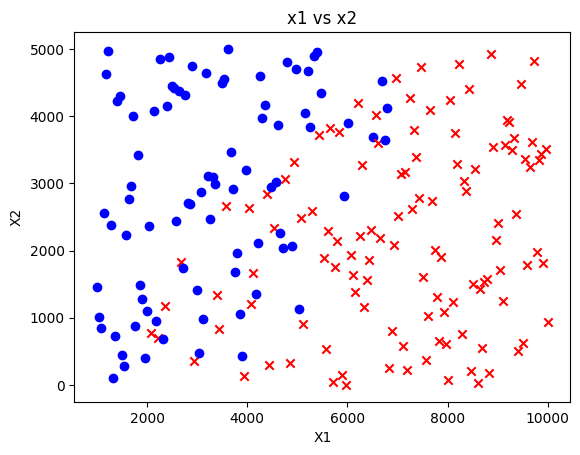

 the shape of trainig set (imput) is : (120, 2)
 the shape of training set (target) is :(120, 1)

 the shape of cross validation set (input) is : (40, 2)
 the shape of cross validation set (target) is (40, 1)

 the shape of test set (input) is :(40, 2)
 the shape of test set (target) is (40, 1)


In [6]:
# let's do calssification
data =np.loadtxt("/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/data_w3_ex2.csv",delimiter =',')
x_bc =data[:,:-1]
y_bc =data[:,-1]
# let's add a new dimension to y_bc
y_bc =np.expand_dims(y_bc,axis=1)

print(f"the shape of inputs x is {x_bc.shape}")
print(f"the shape of outputs y is {y_bc.shape}")

#let's plot this dataset
# we have to features one on x axis"x1" and on on y axis "x2"
for i in range(len(y_bc)):
  marker ='x' if y_bc[i]==1 else 'o'
  c='r' if y_bc[i]==1 else 'b'
  plt.scatter(x_bc[i,0],x_bc[i,1],marker=marker,c=c)
plt.title("x1 vs x2")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

#let's split data to train data and test
from sklearn.model_selection import train_test_split
x_bc_train,x_,y_bc_train,y_ =train_test_split(x_bc,y_bc,test_size=0.40,random_state=1)
x_bc_cv,x_bc_test,y_bc_cv,y_bc_test =train_test_split(x_,y_,test_size =0.50,random_state =1)
del x_,y_

print(f" the shape of trainig set (imput) is : {x_bc_train.shape}")
print(f" the shape of training set (target) is :{y_bc_train.shape}\n")
print(f" the shape of cross validation set (input) is : {x_bc_cv.shape}")
print(f" the shape of cross validation set (target) is {y_bc_cv.shape}\n")
print(f" the shape of test set (input) is :{x_bc_test.shape}")
print(f" the shape of test set (target) is {y_bc_test.shape}")



In [7]:
# we will built something like accuracy metric
probabilities = np.array([0.2,0.6,0.7,0.3,0.8])
predictions =np.where(probabilities >=0.5,1,0)
#ground truth labels
ground_truth =np.array([1,1,1,1,1])
missclassified =0
num_predictions = len(predictions)
for i in range(num_predictions):
  if predictions[i] != ground_truth[i]:
    missclassified +=1

fraction_error =missclassified/num_predictions

print(f"probabilities: {probabilities}")
print(f"predictions with threshold=0.5: {predictions}")
print(f"targets: {ground_truth}")
print(f"fraction of misclassified data (for-loop): {fraction_error}")
print(f"fraction of misclassified data (with np.mean()): {np.mean(predictions != ground_truth)}")


probabilities: [0.2 0.6 0.7 0.3 0.8]
predictions with threshold=0.5: [0 1 1 0 1]
targets: [1 1 1 1 1]
fraction of misclassified data (for-loop): 0.4
fraction of misclassified data (with np.mean()): 0.4


In [8]:
# now we will same models we used befor
# but those models contain linear activation function on output layer
# so we will make regular prediction, then we can apply sigmoid then threshold on it

# we will create three model
tf.random.set_seed(20)
model_1 =Sequential([
    Dense(25,activation ='relu'),
    Dense(15,activation ='relu'),
    Dense(1, activation ='linear')
],name ='model_1'
                    )
model_2 =Sequential([
    Dense(20,activation ='relu'),
    Dense(12,activation ='relu'),
    Dense(12,activation ='relu'),
    Dense(20,activation ='relu'),
    Dense(1, activation ='linear')
], name ='model_2')
model_3 =Sequential([
    Dense(32,activation ='relu'),
    Dense(16,activation ='relu'),
    Dense(8, activation ='relu'),
    Dense(4, activation ='relu'),
    Dense(12,activation ='relu'),
    Dense(1, activation ='linear')
],name ='model_3')

model_list =[model_1,model_2,model_3]
models_bc =model_list
nn_train_error =[]
nn_cv_error = []


for model in models_bc :
  model.compile(
      loss =tf.keras.losses.BinaryCrossentropy(from_logits=True),
      optimizer =tf.keras.optimizers.Adam(learning_rate=0.01)
  )
  print(f"training {model.name}...")
  model.fit(
      x_bc_train,y_bc_train,
      epochs=200,
      verbose=0
  )
  print("Done\n")
  threshold =0.5
  # record error of misclassified exampels for training set
  yhat= model.predict(x_bc_train)
  yhat =tf.math.sigmoid(yhat)
  yhat =np.where(yhat>=threshold,1,0)
  train_error =np.mean(yhat != y_bc_train)
  nn_train_error.append(train_error)
  # Record the fraction of misclassified examples for the cross validation set
  yhat = model.predict(x_bc_cv)
  yhat = tf.math.sigmoid(yhat)
  yhat = np.where(yhat >= threshold, 1, 0)
  cv_error = np.mean(yhat != y_bc_cv)
  nn_cv_error.append(cv_error)

for model_num in range(len(nn_train_error)):
    print(
        f"Model {model_num+1}: Training Set Classification Error: {nn_train_error[model_num]:.5f}, " +
        f"CV Set Classification Error: {nn_cv_error[model_num]:.5f}"
        )

training model_1...
Done

2/2 [==============================] - 0s 4ms/step
training model_2...
Done

2/2 [==============================] - 0s 7ms/step
training model_3...
Done

2/2 [==============================] - 0s 4ms/step
Model 1: Training Set Classification Error: 0.18333, CV Set Classification Error: 0.10000
Model 2: Training Set Classification Error: 0.15000, CV Set Classification Error: 0.05000
Model 3: Training Set Classification Error: 0.20833, CV Set Classification Error: 0.20000


In [9]:
# it looks model 1 is the best

# Select the model with the lowest error
model_num = 1

# Compute the test error
yhat = models_bc[model_num-1].predict(x_bc_test)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
nn_test_error = np.mean(yhat != y_bc_test)

print(f"Selected Model: {model_num}")
print(f"Training Set Classification Error: {nn_train_error[model_num-1]:.4f}")
print(f"CV Set Classification Error: {nn_cv_error[model_num-1]:.4f}")
print(f"Test Set Classification Error: {nn_test_error:.4f}")



2/2 [==============================] - 0s 3ms/step
Selected Model: 1
Training Set Classification Error: 0.1833
CV Set Classification Error: 0.1000
Test Set Classification Error: 0.0500


To fix a high bias problem, you can:

  try adding polynomial features\try getting additional features\try decreasing the regularization parameter

To fix a high variance problem, you can:
try increasing the regularization parameter\n try smaller sets of features \n get more training examples


Text(0.5, 1.0, "degree of polynomial vs train and cv MSE's")

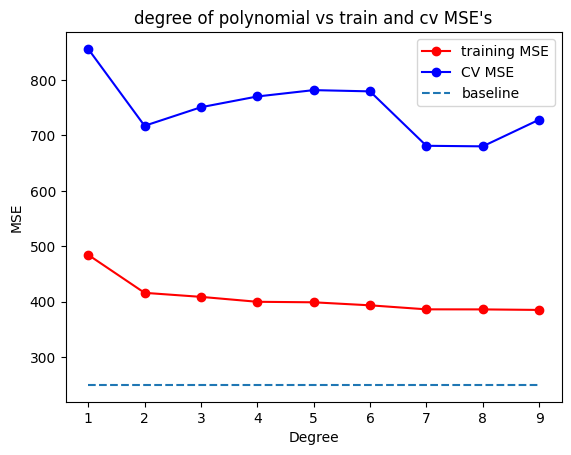

In [10]:
# lab 2 : Diagnosing Bias and Variance
#Before you can diagnose a model for high bias or high variance, it is usually helpful to first have an idea of what level of error you can reasonably get to

from sklearn.linear_model import LinearRegression,Ridge # it's L2 Regularized regression model
#first we will deal with high biase
data =np.loadtxt("/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/c2w3_lab2_data1.csv",delimiter=',')
x =data[:,:-1]
y =data[:,-1]
x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.40,random_state=80)
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.50,random_state=80)

#Instantiat regression model
model =LinearRegression()
#1 let's add polynmial
x_train_mses =[]
x_cv_mses =[]
models =[]

for degree in range(1,10):
  poly =PolynomialFeatures(degree,include_bias=False)
  x_train_mapped =poly.fit_transform(x_train)
  scaler_poly =StandardScaler()
  x_train_mapped_scaled=scaler_poly.fit_transform(x_train_mapped)
  model.fit(x_train_mapped_scaled,y_train)
  models.append(model)
  #compute training mse
  yhat =model.predict(x_train_mapped_scaled)
  train_mse =mean_squared_error(y_train,yhat)/2
  x_train_mses.append(train_mse)
  # now let's do the same to cross validation set
  poly= PolynomialFeatures(degree, include_bias =False)
  x_cv_mapped =poly.fit_transform(x_cv)
  x_cv_mapped_scaled =scaler_poly.transform(x_cv_mapped)
  #compute cv mses
  yhat_2=model.predict(x_cv_mapped_scaled)
  cv_mse =mean_squared_error(y_cv,yhat_2)/2
  x_cv_mses.append(cv_mse)

degree =range(1,10)
plt.plot(degree,x_train_mses,marker='o',c='r',label='training MSE')
plt.plot(degree,x_cv_mses,marker='o',c='b',label='CV MSE')
plt.plot(degree,np.repeat(250,len(degree)),linestyle='--',label ='baseline')
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.legend()
plt.title("degree of polynomial vs train and cv MSE's")


the shape of the training set (input) is: (60, 2)
the shape of the training set (target) is: (60,)

the shape of the cross validation set (input) is: (20, 2)
the shape of the cross validation set (target) is: (20,)

first 5 rows of the training inputs (2 features):
 [[3.75757576e+03 5.49494949e+00]
 [2.87878788e+03 6.70707071e+00]
 [3.54545455e+03 3.71717172e+00]
 [1.57575758e+03 5.97979798e+00]
 [1.66666667e+03 1.61616162e+00]]



Text(0.5, 1.0, "degree of polynomial vs train and cv MSE's")

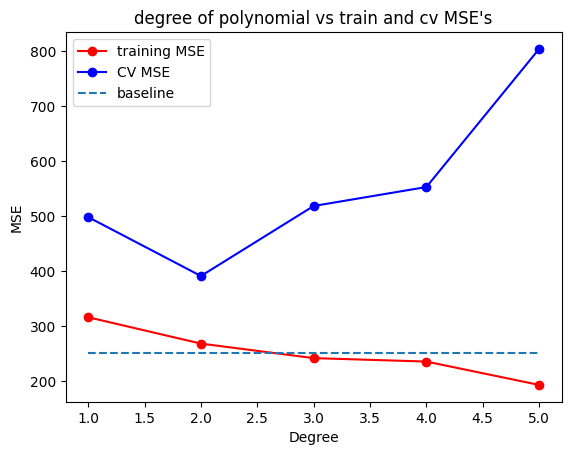

In [11]:
from sklearn.linear_model import LinearRegression,Ridge # it's L2 Regularization
#first we will deal with high biase
data =np.loadtxt("/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/c2w3_lab2_data2.csv",delimiter=',')
x =data[:,:-1]
y =data[:,-1]
x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.40,random_state=80)
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.50,random_state=80)


print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")

# Preview the first 5 rows
print(f"first 5 rows of the training inputs (2 features):\n {x_train[:5]}\n")

#Instantiat regression model
model =LinearRegression()
#let's add polynmial
x_train_mses =[]
x_cv_mses =[]
models =[]

for degree in range(1,6):
  poly =PolynomialFeatures(degree,include_bias=False)
  x_train_mapped =poly.fit_transform(x_train)
  scaler_poly =StandardScaler()
  x_train_mapped_scaled=scaler_poly.fit_transform(x_train_mapped)
  model.fit(x_train_mapped_scaled,y_train)
  models.append(model)
  #compute training mse
  yhat =model.predict(x_train_mapped_scaled)
  train_mse =mean_squared_error(y_train,yhat)/2
  x_train_mses.append(train_mse)
  # now let's do the same to cross validation set
  poly= PolynomialFeatures(degree, include_bias =False)
  x_cv_mapped =poly.fit_transform(x_cv)
  x_cv_mapped_scaled =scaler_poly.transform(x_cv_mapped)
  #compute cv mses
  yhat_2=model.predict(x_cv_mapped_scaled)
  cv_mse =mean_squared_error(y_cv,yhat_2)/2
  x_cv_mses.append(cv_mse)

degree =range(1,6)
plt.plot(degree,x_train_mses,marker='o',c='r',label='training MSE')
plt.plot(degree,x_cv_mses,marker='o',c='b',label='CV MSE')
plt.plot(degree,np.repeat(250,len(degree)),linestyle='--',label ='baseline')
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.legend()
plt.title("degree of polynomial vs train and cv MSE's")



the shape of the training set (input) is: (60, 2)
the shape of the training set (target) is: (60,)

the shape of the cross validation set (input) is: (20, 2)
the shape of the cross validation set (target) is: (20,)

the shape of the test set  (input) is: (20, 2)
the shape of the test set (target) is: (20,)



Text(0.5, 1.0, "degree of polynomial vs train and cv MSE's")

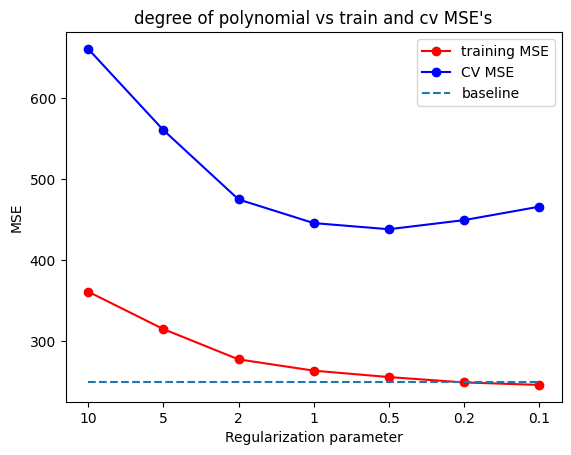

In [12]:
#2 let's use regularization parameters
data =np.loadtxt("/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/c2w3_lab2_data2.csv",delimiter=',')
x =data[:,:-1]
y =data[:,-1]
x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.40,random_state=80)
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.50,random_state=80)


print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set  (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}\n")

reg_params = [10, 5, 2, 1, 0.5, 0.2, 0.1]

#Instantiat regression model

#let's add polynmial
x_train_mses =[]
x_cv_mses =[]
models =[]

degree =4

for reg_param in reg_params:
  poly = PolynomialFeatures(degree, include_bias=False)
  X_train_mapped = poly.fit_transform(x_train)

  # Scale the training set
  scaler_poly = StandardScaler()
  X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
  scalers.append(scaler_poly)

  # Create and train the model
  model = Ridge(alpha=reg_param)
  model.fit(X_train_mapped_scaled, y_train)
  models.append(model)

  # Compute the training MSE
  yhat = model.predict(X_train_mapped_scaled)
  x_train_mse = mean_squared_error(y_train, yhat) / 2
  x_train_mses.append(x_train_mse)

  # Add polynomial features and scale the cross-validation set
  poly = PolynomialFeatures(degree, include_bias=False)
  X_cv_mapped = poly.fit_transform(x_cv)
  X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

  # Compute the cross-validation MSE
  yhat = model.predict(X_cv_mapped_scaled)
  x_cv_mse = mean_squared_error(y_cv, yhat) / 2
  x_cv_mses.append(x_cv_mse)




reg_params = [str(x) for x in reg_params]
plt.plot(reg_params,x_train_mses,marker='o',c='r',label='training MSE')
plt.plot(reg_params,x_cv_mses,marker='o',c='b',label='CV MSE')
plt.plot(reg_params,np.repeat(250,len(reg_params)),linestyle='--',label ='baseline')
plt.xlabel("Regularization parameter")
plt.ylabel("MSE")
plt.legend()
plt.title("degree of polynomial vs train and cv MSE's")

Text(0.5, 1.0, "degree of polynomial vs train and cv MSE's")

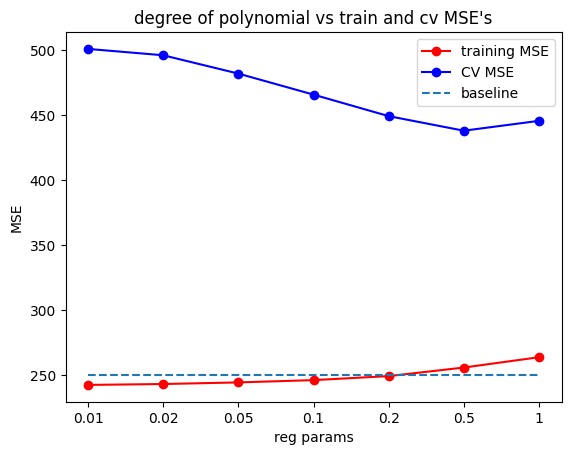

In [13]:
#fixing high variance
#1  increasing regularization parameters
reg_params = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]

#let's add polynmial
x_train_mses =[]
x_cv_mses =[]
models =[]

degree =4

for reg_param in reg_params:
  poly = PolynomialFeatures(degree, include_bias=False)
  X_train_mapped = poly.fit_transform(x_train)

  # Scale the training set
  scaler_poly = StandardScaler()
  X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
  scalers.append(scaler_poly)

  # Create and train the model
  model = Ridge(alpha=reg_param)
  model.fit(X_train_mapped_scaled, y_train)
  models.append(model)

  # Compute the training MSE
  yhat = model.predict(X_train_mapped_scaled)
  x_train_mse = mean_squared_error(y_train, yhat) / 2
  x_train_mses.append(x_train_mse)

  # Add polynomial features and scale the cross-validation set
  poly = PolynomialFeatures(degree, include_bias=False)
  X_cv_mapped = poly.fit_transform(x_cv)
  X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

  # Compute the cross-validation MSE
  yhat = model.predict(X_cv_mapped_scaled)
  x_cv_mse = mean_squared_error(y_cv, yhat) / 2
  x_cv_mses.append(x_cv_mse)




reg_params = [str(x) for x in reg_params]
plt.plot(reg_params,x_train_mses,marker='o',c='r',label='training MSE')
plt.plot(reg_params,x_cv_mses,marker='o',c='b',label='CV MSE')
plt.plot(reg_params,np.repeat(250,len(reg_params)),linestyle='--',label ='baseline')
plt.xlabel("reg params")
plt.ylabel("MSE")
plt.legend()
plt.title("degree of polynomial vs train and cv MSE's")





the shape of the training set (input_1) is: (60, 2)
the shape of the training set (target_1) is: (60,)

the shape of the cross validation set (input_1) is: (20, 2)
the shape of the cross validation set (target_1) is: (20,)

the shape of the test set  (input_1) is: (20, 2)
the shape of the test set (target_1) is: (20,)

the shape of the training set (input_2) is: (60, 3)
the shape of the training set (target_2) is: (60,)

the shape of the cross validation set (input_2) is: (20, 3)
the shape of the cross validation set (target_2) is: (20,)

the shape of the test set  (input_2) is: (20, 3)
the shape of the test set (target_2) is: (20,)



Text(0.5, 1.0, "degree of polynomial vs train and cv MSE's")

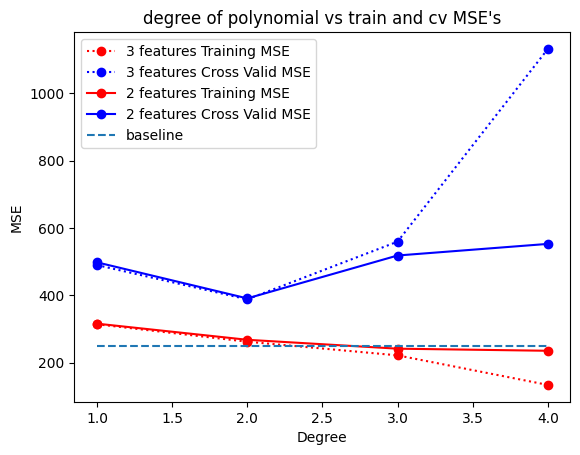

In [14]:
#2 try smaller set of features

# this data conitan 2 features
# we will check performance of model using 2 features and 3 features
data =np.loadtxt("/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/c2w3_lab2_data2.csv",delimiter=',')
x_1 =data[:,:-1]
y_1 =data[:,-1]
x_train_1,x__1,y_train_1,y__1=train_test_split(x_1,y_1,test_size=0.40,random_state=80)
x_cv_1,x_test_1,y_cv_1,y_test_1=train_test_split(x__1,y__1,test_size=0.50,random_state=80)


print(f"the shape of the training set (input_1) is: {x_train_1.shape}")
print(f"the shape of the training set (target_1) is: {y_train_1.shape}\n")
print(f"the shape of the cross validation set (input_1) is: {x_cv_1.shape}")
print(f"the shape of the cross validation set (target_1) is: {y_cv_1.shape}\n")
print(f"the shape of the test set  (input_1) is: {x_test_1.shape}")
print(f"the shape of the test set (target_1) is: {y_test_1.shape}\n")


#this data contain 3 features
data =np.loadtxt("/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/c2w3_lab2_data3.csv",delimiter=',')
x_2 =data[:,:-1]
y_2 =data[:,-1]
x_train_2,x__2,y_train_2,y__2=train_test_split(x_2,y_2,test_size=0.40,random_state=80)
x_cv_2,x_test_2,y_cv_2,y_test_2=train_test_split(x__2,y__2,test_size=0.50,random_state=80)


print(f"the shape of the training set (input_2) is: {x_train_2.shape}")
print(f"the shape of the training set (target_2) is: {y_train_2.shape}\n")
print(f"the shape of the cross validation set (input_2) is: {x_cv_2.shape}")
print(f"the shape of the cross validation set (target_2) is: {y_cv_2.shape}\n")
print(f"the shape of the test set  (input_2) is: {x_test_2.shape}")
print(f"the shape of the test set (target_2) is: {y_test_2.shape}\n")


model = LinearRegression()

# Define properties of the 2 datasets
file1 = {'filename':'/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/c2w3_lab2_data3.csv', 'label': '3 features', 'linestyle': 'dotted'}
file2 = {'filename':'/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/c2w3_lab2_data2.csv', 'label': '2 features', 'linestyle': 'solid'}
files = [file1, file2]
for file in files :
  degrees =range(1,5)
  data =np.loadtxt(file['filename'],delimiter=',')
  x =data[:,:-1]
  y =data[:,-1]
  x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.40,random_state=80)
  x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.50,random_state=80)
  x_train_mses = []
  x_cv_mses = []
  for degree in range(1,5):
    poly =PolynomialFeatures(degree,include_bias=False)
    x_train_mapped =poly.fit_transform(x_train)
    scaler_poly =StandardScaler()
    x_train_mapped_scaled=scaler_poly.fit_transform(x_train_mapped)
    model = LinearRegression()
    model.fit(x_train_mapped_scaled,y_train)
    models.append(model)
    #compute training mse
    yhat =model.predict(x_train_mapped_scaled)
    x_train_mse =mean_squared_error(y_train,yhat)/2
    x_train_mses.append(x_train_mse)
    # now let's do the same to cross validation set
    poly= PolynomialFeatures(degree, include_bias =False)
    x_cv_mapped =poly.fit_transform(x_cv)
    x_cv_mapped_scaled =scaler_poly.transform(x_cv_mapped)
    #compute cv mses
    yhat_2=model.predict(x_cv_mapped_scaled)
    x_cv_mse =mean_squared_error(y_cv,yhat_2)/2
    x_cv_mses.append(x_cv_mse)
  plt.plot(degrees,x_train_mses,marker='o',c='r',label=f"{file['label']} Training MSE",linestyle =file['linestyle'])
  plt.plot(degrees,x_cv_mses,marker='o',c='b',label=f"{file['label']} Cross Valid MSE",linestyle=file['linestyle'])

plt.plot(degrees,np.repeat(250,len(degrees)),linestyle='--',label ='baseline')
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.legend()
plt.title("degree of polynomial vs train and cv MSE's")
# you can see there is huge overfitting here, traing set mse for 3 features is too low
# but when it comes to validation set it's very high
# wht we need actually balance between both of them


the shape of the training set (input) is: (600, 2)
the shape of the training set (target) is: (600,)

the shape of the cross validation set (input) is: (200, 2)
the shape of the cross validation set (target) is: (200,)

the shape of the test set  (input) is: (200, 2)
the shape of the test set (target) is: (200,)



Text(0.5, 1.0, 'number of examples vs. train and CV MSEs')

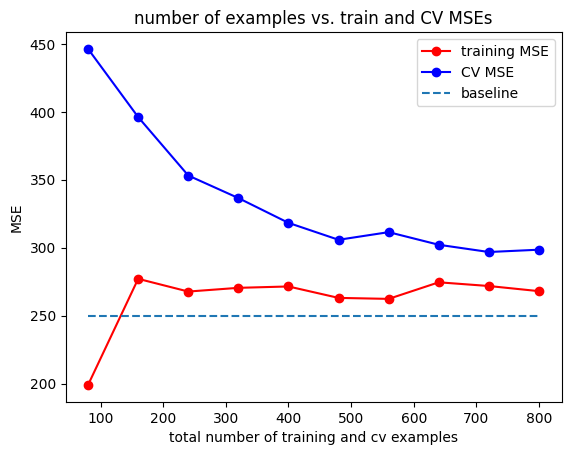

In [15]:
#3 you can get more examples on
data =np.loadtxt("/content/drive/MyDrive/Colab Notebooks/data/ML Specialization/c2w3_lab2_data4.csv",delimiter=',')
x =data[:,:-1]
y =data[:,-1]
x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.40,random_state=80)
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.50,random_state=80)


print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set  (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}\n")

model =LinearRegression()
#1 let's add polynmial
x_train_mses =[]
x_cv_mses =[]
models =[]
num_samples_train_and_cv = []
percents = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for percent in percents:
  num_samples_train =round(len(x_train)*(percent/100.0))
  num_samples_cv =round(len(x_cv)*(percent/100.0))
  num_samples_train_and_cv.append(num_samples_train + num_samples_cv)

  x_train_sub = x_train[:num_samples_train]
  y_train_sub = y_train[:num_samples_train]
  x_cv_sub = x_cv[:num_samples_cv]
  y_cv_sub = y_cv[:num_samples_cv]
  # add polynomial feautrs to the training set
  poly =PolynomialFeatures(degree,include_bias=False)
  x_train_mapped =poly.fit_transform(x_train_sub)
  scaler_poly = StandardScaler()
  x_train_mapped_scaled=scaler_poly.fit_transform(x_train_mapped)
  model = LinearRegression()
  model.fit(x_train_mapped_scaled,y_train_sub)
  models.append(model)
  #compute training mse
  yhat =model.predict(x_train_mapped_scaled)
  train_mse =mean_squared_error(y_train_sub,yhat)/2
  x_train_mses.append(train_mse)
  # now let's do the same to cross validation set
  poly= PolynomialFeatures(degree, include_bias =False)
  x_cv_mapped =poly.fit_transform(x_cv_sub)
  x_cv_mapped_scaled =scaler_poly.transform(x_cv_mapped)
  #compute cv mses
  yhat_2=model.predict(x_cv_mapped_scaled)
  cv_mse =mean_squared_error(y_cv_sub,yhat_2)/2
  x_cv_mses.append(cv_mse)

plt.plot(num_samples_train_and_cv,x_train_mses,marker='o',c='r',label='training MSE')
plt.plot(num_samples_train_and_cv,x_cv_mses,marker='o',c='b',label='CV MSE')
plt.plot(num_samples_train_and_cv,np.repeat(250,len(percents)),linestyle='--',label ='baseline')
plt.xlabel("total number of training and cv examples")
plt.ylabel("MSE")
plt.legend()
plt.title("number of examples vs. train and CV MSEs")

# the cross validation error starts to approach training error as data set increase

#**week3 assignment**


x.shape (18,) y.shape (18,)
x_train.shape (12,) y_train.shape (12,)
x_test.shape (6,) y_test.shape (6,)


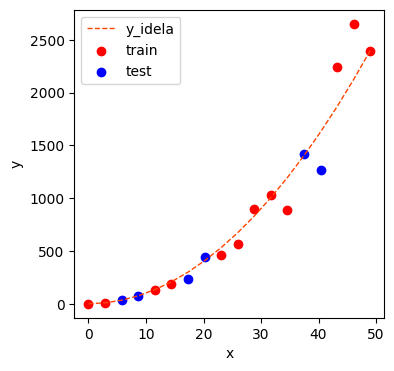

value of loss function : 0.0050000000000000305
training err 58.01, test err 171215.01


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow  as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

# to test your model
#1 split your data, into training set and test set
#2 develop an error function to evaluate your model

# let's generate our data then split it
def gen_data(m,seed=1,scale=0.7):
  c =0
  x_train =np.linspace(0,49,m)
  np.random.seed(seed)
  y_ideal =x_train**2 + c
  y_train =y_ideal + scale * y_ideal*(np.random.sample((m,))-0.5)
  x_ideal =x_train
  return x_train,y_train,x_ideal,y_ideal
# data  is for quadratic function with noise added to it
m=18
x,y,x_ideal,y_ideal =gen_data(m,2,0.7)
print("x.shape",x.shape,"y.shape",y.shape)
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.33,random_state =1)
print("x_train.shape",x_train.shape,"y_train.shape",y_train.shape)
print("x_test.shape",x_test.shape,"y_test.shape",y_test.shape)

fig,ax =plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal,y_ideal,"--",color="orangered",label ='y_idela',lw=1)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x_train,y_train,color ='red',label='train')
ax.scatter(x_test,y_test,color ='blue',label='test')
plt.legend(loc='upper left')
plt.show()

#evaluate linear regression model
# assume that you have yhat =f_wb
#let's build eval MSE function
def eval_mse(y,yhat):
  m =len(y)
  error =0.0
  for i in range(m):
    loss =(yhat[i]-y[i])**2
    error =error+loss
  final_loss= error/(2*m)
  return final_loss

#let's check this function
y_hat =np.array([2.4,4.2])
y_temp=np.array([2.3,4.1])
loss = eval_mse(y_temp,y_hat)
print(f"value of loss function : {loss}")

#let's make linear regression with 10 degree
degree =10
poly =PolynomialFeatures(degree,include_bias=False)
#x_train on shape(12,), polynomialfeature would expect 2d with shape (12,1)
x_train_mapped =poly.fit_transform(x_train.reshape(-1,1))
scaler =StandardScaler()
x_train_mapped_scaled = scaler.fit_transform(x_train_mapped)
model =LinearRegression()
model.fit(x_train_mapped_scaled,y_train)
# let's predict values
yhat =model.predict(x_train_mapped_scaled)
err_train =eval_mse(y_train,yhat)
# to predict values for x_test , you need first to all feture scaling and polynomial features
x_test_mapped=poly.fit_transform(x_test.reshape(-1,1))
x_test_mapped_scaled =scaler.transform(x_test_mapped)
yhat_test =model.predict(x_test_mapped_scaled)
err_test =eval_mse(y_test,yhat_test)
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

# from chart it looks very easy for model to fit this dta
# but we have created polynomial model of 10 degree this very complex model
# so mse value for training data is low, but value for test data is very high because model is overfitting on trainig data


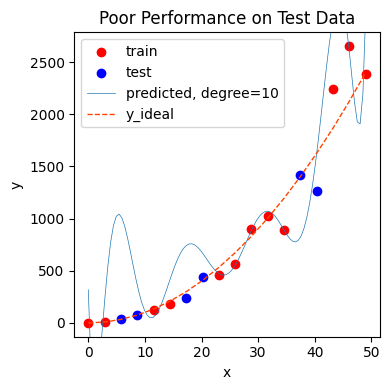

In [2]:
X,y,x_ideal,y_ideal =gen_data(18,2,0.7)
degree =10
poly =PolynomialFeatures(degree,include_bias=False)
#x_train on shape(12,), polynomialfeature would expect 2d with shape (12,1)
x_train_mapped =poly.fit_transform(x_train.reshape(-1,1))
scaler =StandardScaler()
x_train_mapped_scaled = scaler.fit_transform(x_train_mapped)
model =LinearRegression()
model.fit(x_train_mapped_scaled,y_train)
x_test_mapped =poly.fit_transform(x_test.reshape(-1,1))
x_test_mapped_scaled = scaler.transform(x_test_mapped)

def plt_train_test(X_train, y_train, X_test, y_test, x, y_pred, x_ideal, y_ideal, degree):
    fig, ax = plt.subplots(1,1, figsize=(4,4))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

    ax.set_title("Poor Performance on Test Data",fontsize = 12)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    ax.scatter(X_train, y_train, color = "red",           label="train")
    ax.scatter(X_test, y_test,       color = "blue", label="test")
    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_ylim())
    ax.plot(x, y_pred,  lw=0.5, label=f"predicted, degree={degree}")
    ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
    ax.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

    # plot predictions over data range
x = np.linspace(0,int(X.max()),100)  # predict values for plot
poly =PolynomialFeatures(degree,include_bias=False)
#x_train on shape(12,), polynomialfeature would expect 2d with shape (12,1)
x_mapped =poly.fit_transform(x.reshape(-1,1))
scaler =StandardScaler()
x_mapped_scaled = scaler.fit_transform(x_mapped)
y_pred = model.predict(x_mapped_scaled).reshape(-1,1)
plt_train_test(x_train, y_train, x_test, y_test, x, y_pred, x_ideal, y_ideal, degree)

In [3]:
# you can see model degree is too high and model has highvariance

x.shape (40,) y.shape (40,)
x)train.shape (24,) y_trains.shae (24,)
x_cv.shape (8,) y_train.shape (8,)
x_test.shape (8,) y_test.shape (8,)


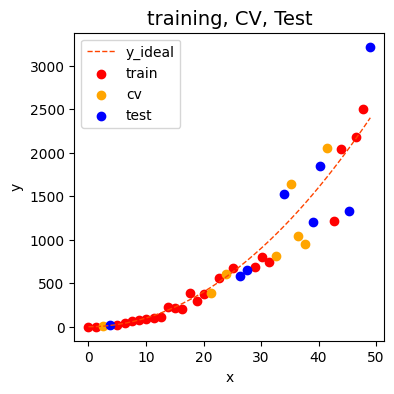


Optimal Degree 2


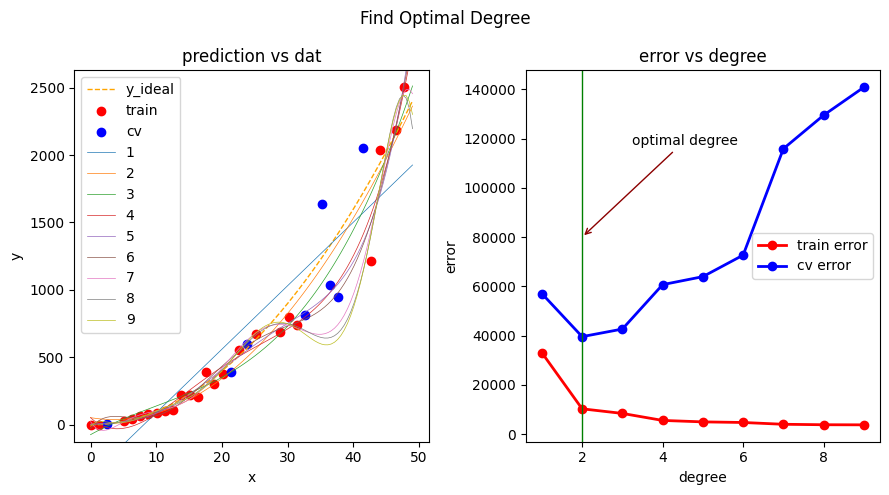

In [4]:
x,y,x_ideal,y_ideal =gen_data(40,5,0.7)
print("x.shape",x.shape,"y.shape",y.shape)

x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.40,random_state=1)
x_cv,x_test,y_cv,y_test =train_test_split(x_,y_,test_size=0.50,random_state =1)
print("x)train.shape",x_train.shape,"y_trains.shae",y_train.shape)
print("x_cv.shape",x_cv.shape,"y_train.shape",y_cv.shape)
print("x_test.shape",x_test.shape,"y_test.shape",y_test.shape)

fig,ax =plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal,y_ideal,"--",color ="orangered",label="y_ideal",lw=1)
ax.set_title("training, CV, Test",fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x_train,y_train,color="red",label="train")
ax.scatter(x_cv,y_cv,color="orange",label="cv")
ax.scatter(x_test,y_test,color="blue",label="test")
ax.legend(loc="upper left")
plt.show()

#1 finding optimial degree
max_degree =9
err_train =np.zeros(max_degree)
err_cv =np.zeros(max_degree)
x_ = np.linspace(0,int(x.max()),100)
y_pred =np.zeros((100,max_degree))

for degree in range(max_degree):
  poly =PolynomialFeatures(degree+1,include_bias=False)
  x_train_mapped = poly.fit_transform(x_train.reshape(-1,1))
  scaler = StandardScaler()
  x_train_mapped_scaled =scaler.fit_transform(x_train_mapped)
  model = LinearRegression()
  model.fit(x_train_mapped_scaled,y_train)
  yhat = model.predict(x_train_mapped_scaled)
  err_train[degree] = eval_mse(y_train,yhat)

  x_cv_mapped = poly.fit_transform(x_cv.reshape(-1,1))
  x_cv_mapped_scaled = scaler.transform(x_cv_mapped)
  yhat = model.predict(x_cv_mapped_scaled)
  err_cv[degree] = eval_mse(y_cv,yhat)

  x__mapped = poly.fit_transform(x_.reshape(-1,1))
  x__mapped_scaled = scaler.transform(x__mapped)
  y_pred[:,degree] = model.predict(x__mapped_scaled)
optimal_degree = np.argmin(err_cv)+1
print(f"\nOptimal Degree {optimal_degree}")
# let's plot this to make sure of optimal degree values
fig,ax =plt.subplots(1,2,figsize=(9,5))
fig.canvas.toolbar_visible=False
fig.canvas.header_visible =False
fig.canvas.footer_visible =False
ax[0].set_title("prediction vs dat",fontsize=12)
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].plot(x_ideal,y_ideal,"--",color= "orange",label="y_ideal",lw=1)
ax[0].scatter(x_train,y_train,color ='red',label ='train')
ax[0].scatter(x_cv,y_cv,color ='blue',label ='cv')
ax[0].set_xlim(ax[0].get_xlim())
ax[0].set_ylim(ax[0].get_ylim())
for i in range(0,max_degree):
  ax[0].plot(x_,y_pred[:,i],lw=0.5,label=f"{i+1}")
ax[0].legend(loc ='upper left')
ax[1].set_title("error vs degree",fontsize=12)
cpts =list(range(1,max_degree+1))
ax[1].plot(cpts,err_train[0:],marker='o',label ='train error',lw =2,color="red")
ax[1].plot(cpts,err_cv[0:],marker='o',label ='cv error',lw=2,color ='blue')
ax[1].axvline(optimal_degree, lw=1, color = 'green')
ax[1].annotate("optimal degree", xy=(optimal_degree,80000),xycoords='data',
                xytext=(0.3, 0.8), textcoords='axes fraction', fontsize=10,
                   arrowprops=dict(arrowstyle="->", connectionstyle="arc3",
                                   color='darkred', lw=1))
ax[1].set_xlabel("degree")
ax[1].set_ylabel("error")
ax[1].legend()
fig.suptitle("Find Optimal Degree",fontsize = 12)
plt.tight_layout()

In [5]:
#2 use regularization
x,y,x_ideal,y_ideal =gen_data(40,5,0.7)
print("x.shape",x.shape,"y.shape",y.shape)
x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.40,random_state=1)
x_cv,x_test,y_cv,y_test =train_test_split(x_,y_,test_size=0.50,random_state =1)


x.shape (40,) y.shape (40,)


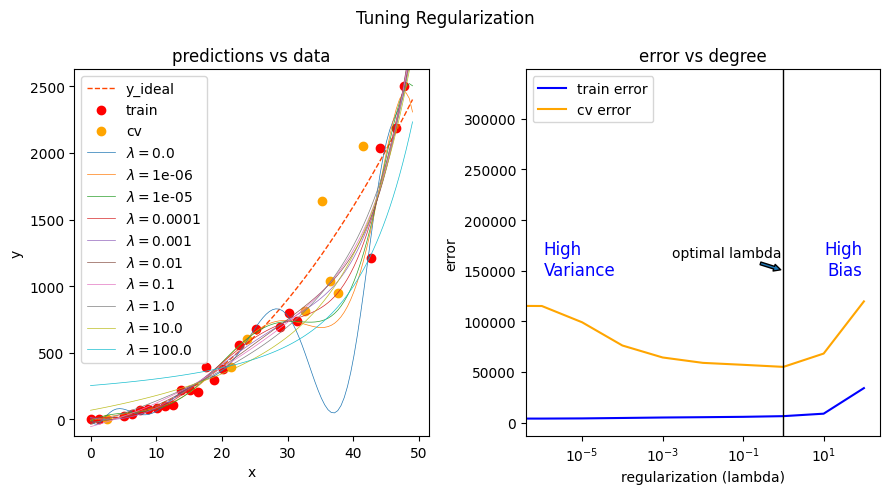

In [6]:
#2 use regularization
lambda_range =np.array([0.0, 1e-6, 1e-5, 1e-4,1e-3,1e-2, 1e-1,1,10,100])
num_steps =len(lambda_range)
degree =10
err_train =np.zeros(num_steps)
err_cv =np.zeros(num_steps)
x_reg = np.linspace(0,int(x.max()),100)
y_pred =np.zeros((100,num_steps))

for i in range(num_steps):
  lambda_ =lambda_range[i]
  poly =PolynomialFeatures(degree,include_bias =False)
  x_train_mapped =poly.fit_transform(x_train.reshape(-1,1))
  scaler =StandardScaler()
  x_train_mapped_scaled =scaler.fit_transform(x_train_mapped)
  model =Ridge(alpha=lambda_)
  model.fit(x_train_mapped_scaled,y_train)
  yhat =model.predict(x_train_mapped_scaled)
  err_train[i] = eval_mse(y_train,yhat)

  x_cv_mapped = poly.fit_transform(x_cv.reshape(-1,1))
  x_cv_mapped_scaled = scaler.transform(x_cv_mapped)
  yhat =model.predict(x_cv_mapped_scaled)
  err_cv[i]=eval_mse(y_cv,yhat)
  x_reg_mapped =poly.fit_transform(x_reg.reshape(-1,1))
  x_reg_mapped_scaled = scaler.transform(x_reg_mapped)
  y_pred[:,i] = model.predict(x_reg_mapped_scaled)

optimal_reg_idx  =np.argmin(err_cv)

fig, ax = plt.subplots(1,2,figsize=(9,5))
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
ax[0].set_title("predictions vs data",fontsize = 12)
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

ax[0].plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax[0].scatter(x_train, y_train, color = "red",           label="train")
ax[0].scatter(x_cv, y_cv,       color = "orange", label="cv")
ax[0].set_xlim(ax[0].get_xlim())
ax[0].set_ylim(ax[0].get_ylim())
for i in range(0,num_steps):
  ax[0].plot(x_reg, y_pred[:,i],  lw=0.5, label=f"$\lambda =${lambda_range[i]}")
ax[0].legend(loc='upper left')

ax[1].set_title("error vs degree",fontsize = 12)
ax[1].plot(lambda_range, err_train[:], label="train error", color = 'blue')
ax[1].plot(lambda_range, err_cv[:],    label="cv error",    color = 'orange')
ax[1].set_xscale('log')
ax[1].set_ylim(*ax[1].get_ylim())
opt_x = lambda_range[optimal_reg_idx]
ax[1].vlines(opt_x, *ax[1].get_ylim(), color = "black", lw=1)
ax[1].annotate("optimal lambda", (opt_x,150000), xytext=(-80,10), textcoords="offset points",
                  arrowprops={'arrowstyle':'simple'})
ax[1].set_xlabel("regularization (lambda)")
ax[1].set_ylabel("error")
fig.suptitle("Tuning Regularization",fontsize = 12)
ax[1].text(0.05,0.44,"High\nVariance",fontsize=12, ha='left',transform=ax[1].transAxes,color = 'blue')
ax[1].text(0.95,0.44,"High\nBias",    fontsize=12, ha='right',transform=ax[1].transAxes,color = 'blue')
ax[1].legend(loc='upper left')
plt.tight_layout()
plt.show()


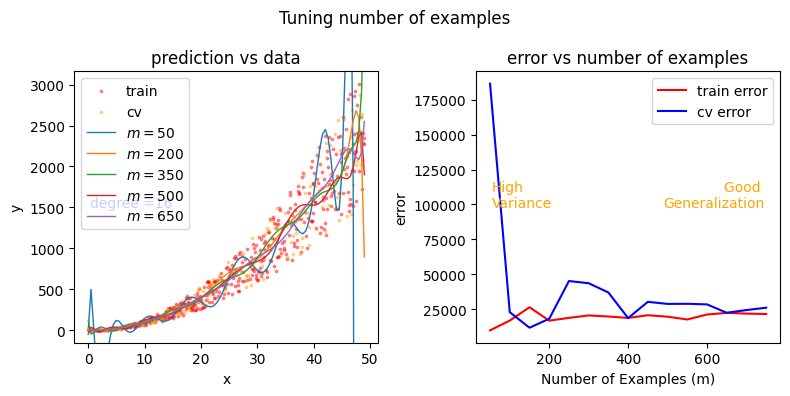

In [7]:
#collect more data
m = 50
m_range = np.array(m*np.arange(1,16))
num_steps = m_range.shape[0]
degree = 16
err_train = np.zeros(num_steps)
err_cv = np.zeros(num_steps)
y_pred = np.zeros((100,num_steps))
for i in range(num_steps):
  x,y,x_ideal,y_ideal =gen_data(m_range[i],5,0.7)
  x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.40,random_state=1)
  x_cv,x_test,y_cv,y_test =train_test_split(x_,y_,test_size=0.50,random_state =1)
  x_total = np.linspace(0,int(x.max()),100)
  poly =PolynomialFeatures(degree,include_bias =False)
  x_train_mapped =poly.fit_transform(x_train.reshape(-1,1))
  scaler =StandardScaler()
  x_train_mapped_scaled =scaler.fit_transform(x_train_mapped)
  model =LinearRegression()
  model.fit(x_train_mapped_scaled,y_train)
  yhat =model.predict(x_train_mapped_scaled)
  err_train[i] = eval_mse(y_train,yhat)
  x_cv_mapped = poly.fit_transform(x_cv.reshape(-1,1))
  x_cv_mapped_scaled = scaler.transform(x_cv_mapped)
  yhat =model.predict(x_cv_mapped_scaled)
  err_cv[i]=eval_mse(y_cv,yhat)
  x_total_mapped =poly.fit_transform(x_total.reshape(-1,1))
  x_total_mapped_scaled = scaler.transform(x_total_mapped)
  y_pred[:,i] = model.predict(x_total_mapped_scaled)

# let's plot this results
fig,ax =plt.subplots(1,2,figsize=(8,4))
fig.canvas.toolbar_visible=False
fig.canvas.heder_visible= False
fig.canvas.footer_visible =False

ax[0].set_title("prediction vs data",fontsize=12)
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

ax[0].scatter(x_train,y_train,color='red',s=3,label='train',alpha=0.4)
ax[0].scatter(x_cv,y_cv,color ='orange',s=3,label ='cv',alpha=0.4)
ax[0].set_xlim(ax[0].get_xlim())
ax[0].set_ylim(ax[0].get_ylim())
for i in range(0,len(m_range),3):
  ax[0].plot(x_total,y_pred[:,i],lw =1,label=f"$m=${m_range[i]}")
ax[0].legend(loc='upper left')
ax[0].text(0.05,0.5,f"degree ={degree}",fontsize=10,ha="left",transform=ax[0].transAxes,color ='blue')
ax[1].set_title("error vs number of examples",fontsize = 12)
ax[1].plot(m_range, err_train[:], label="train error", color = 'red')
ax[1].plot(m_range, err_cv[:],    label="cv error",    color = 'blue')
ax[1].set_xlabel("Number of Examples (m)")
ax[1].set_ylabel("error")
fig.suptitle("Tuning number of examples",fontsize = 12)
ax[1].text(0.05,0.5,"High\nVariance",        fontsize=10, ha='left',transform=ax[1].transAxes,color = 'orange')
ax[1].text(0.95,0.5,"Good \nGeneralization", fontsize=10, ha='right',transform=ax[1].transAxes,color = 'orange')
ax[1].legend()
plt.tight_layout()
plt.show()

x_train shape (400, 2) x_cv.shape (320, 2) x_test.shape (80, 2)


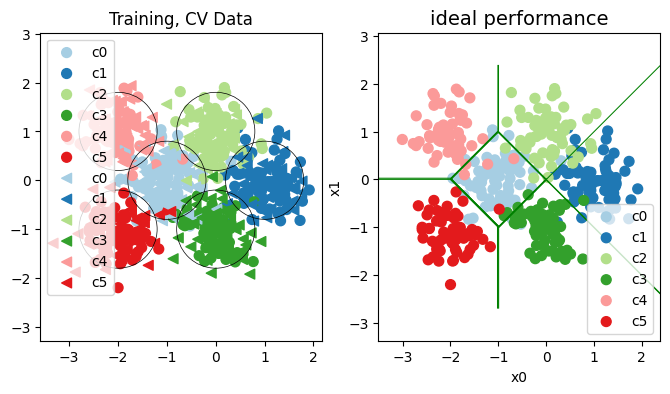

In [8]:
#now  let's move to neural networks
from sklearn.datasets import make_blobs
def gen_blobs():
  classes =6
  m=800
  std =0.4
  centers =np.array([[-1,0],[1,0],[0,1],[0,-1],[-2,1],[-2,-1]])
  x,y =make_blobs(n_samples =m,centers =centers,cluster_std =std,random_state =2,n_features=1)
  return (x,y,centers,classes,std)

x,y,center,classes,std=gen_blobs()
x_train,x_,y_train,y_ =train_test_split(x,y,test_size=0.50,random_state =1)
x_cv,x_test,y_cv,y_test =train_test_split(x_,y_,test_size=0.20,random_state=1)
print("x_train shape",x_train.shape,"x_cv.shape",x_cv.shape,"x_test.shape",x_test.shape)



# let's plot this data
# we need to define function first
def plt_mc_data(ax, X, y, classes,  class_labels=None, map=plt.cm.Paired, legend=False,size=50, m='o'):
    for i in range(classes):
        idx = np.where(y == i)
        col = len(idx[0])*[i]
        label = class_labels[i] if class_labels else "c{}".format(i)
        ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
                    c=col, vmin=0, vmax=map.N, cmap=map,
                    s=size, label=label)
    if legend: ax.legend()
    ax.axis('equal')

# we need to define new function to plot decision boundaries
def plot_cat_decision_boundary(ax, X,predict , class_labels=None, legend=False, vector=True, color='g', lw = 1):

    # create a mesh to points to plot
    pad = 0.5
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad
    h = max(x_max-x_min, y_max-y_min)/200
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    points = np.c_[xx.ravel(), yy.ravel()]
    #print("points", points.shape)
    #make predictions for each point in mesh
    if vector:
        Z = predict(points)
    else:
        Z = np.zeros((len(points),))
        for i in range(len(points)):
            Z[i] = predict(points[i].reshape(1,2))
    Z = Z.reshape(xx.shape)

    #contour plot highlights boundaries between values - classes in this case
    ax.contour(xx, yy, Z, colors=color, linewidths=lw)
    ax.axis('tight')
# we need to define another function
def recat(pt, origins):
    """ categorize a point based on distance from origin of clusters """
    nclusters = len(origins)
    min_dist = 10000
    y_new = None
    for j in range(nclusters):
        temp = origins[j] - pt.reshape(2,)
        #print(temp.shape,origins[j].shape)
        dist = np.sqrt(np.dot(temp.T, temp))
        if dist < min_dist:
            y_new = j
            min_dist = dist
    return(y_new)
# let's plot data using this function
css =np.unique(y_train)
fig,ax =plt.subplots(1,2,figsize=(8,4))
fig.canvas.toolbar_visible =False
fig.canvas.header_visible =False
fig.canvas.footer_visible =False
plt_mc_data(ax[0],x_train,y_train,classes,legend=True,size =50)
plt_mc_data(ax[0],x_cv,y_cv,classes,legend =True,m="<")
ax[0].set_title("Training, CV Data")
for c in css:
  circ = plt.Circle(center[c], 2*std, clip_on=False, fill=False, lw=0.5)
  ax[0].add_patch(circ)


#make a model for plotting routines to call
cat_predict = lambda pt: recat(pt.reshape(1,2), center)
plot_cat_decision_boundary(ax[1], x_train, cat_predict,  vector=False,  lw=0.75)
ax[1].set_title("ideal performance", fontsize=14)

#add the original data to the decison boundary
plt_mc_data(ax[1], x_train,y_train, classes,  legend=True, size=50)
ax[1].set_xlabel('x0') ; ax[1].set_ylabel("x1");
plt.show()

In [9]:
# to evlaute classifieng model, we are gonna use accuracy function not mse
# accuracy means (total_correct/total examples), to compute total correct examples you will conside y=yhat equal 1, but if y!= yhat then zero

# this function compute accuracy as error valus not of right values
def eval_cat_err(y,yhat):
  m=len(y)
  incorrect_values=0
  for i in range(m):
    if(yhat[i]!=y[i]):
      incorrect_values+=1
  cerr = incorrect_values/m
  return(cerr)
# let's check this function
y_hat =np.array([1,2,0])
y_temp=np.array([1,2,3])
print(f"categorization error {np.squeeze(eval_cat_err(y_hat,y_temp)):0.3f},expecte:0.333")
y_hat =np.array([[1],[2],[0],[3]])
y_temp=np.array([[1],[2],[1],[3]])
print(f"categorization error:{np.squeeze(eval_cat_err(y_hat,y_temp)):0.3f},expecte:0.250")


categorization error 0.333,expecte:0.333
categorization error:0.250,expecte:0.250


In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,sigmoid,linear

tf.random.set_seed(1234)
model =Sequential(
    [
        tf.keras.layers.Dense(120,activation ="relu"),
        tf.keras.layers.Dense(40,activation ='relu'),
        tf.keras.layers.Dense(6,activation ='linear') # this means we will apply softmax fuction latet
    ]
)

model.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer =tf.keras.optimizers.Adam(lr =0.01)
)

model.fit(x_train,y_train,epochs=1000,verbose=0)



In [11]:

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               360       
                                                                 
 dense_1 (Dense)             (None, 40)                4840      
                                                                 
 dense_2 (Dense)             (None, 6)                 246       
                                                                 
Total params: 5446 (21.27 KB)
Trainable params: 5446 (21.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1082/1082 [==============================] - 2s 2ms/step


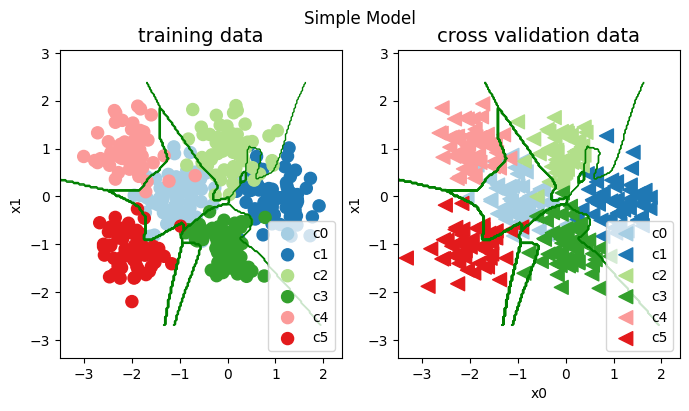

In [12]:

model_predict_s = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1) # we apply soft max activation function on output of last layer
fig,ax =plt.subplots(1,2,figsize=(8,4))
fig.canvas.toolbar_visible=False
fig.canvas.header_visible =False
fig.canvas.footer_visible =False
plot_cat_decision_boundary(ax[0],x_train,model_predict_s,vector =True)
ax[0].set_title("training data",fontsize=14)
plt_mc_data(ax[0],x_train,y_train,classes,legend=True,size=75)
plot_cat_decision_boundary(ax[1],x_train,model_predict_s,vector=True)
ax[1].set_xlabel("x0");ax[0].set_ylabel("x1");
plot_cat_decision_boundary(ax[1],x_train,model_predict_s,vector=True)
ax[1].set_title("cross validation data",fontsize=14)
plt_mc_data(ax[1],x_cv,y_cv,classes,legend =True,size=100,m='<')
ax[1].set_xlabel('x0');ax[1].set_ylabel("x1");
fig.suptitle("Simple Model",fontsize=12)
plt.show()

In [13]:
# now let's check evaluate this model using our eval_cat_err fnction
training_cerr_complex = eval_cat_err(y_train,model_predict_s(x_train))
cv_cerr_complex = eval_cat_err(y_cv,model_predict_s(x_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 1ms/step
categorization error, training, complex model: 0.035
categorization error, cv,       complex model: 0.103


In [14]:
# let's make simpler model
tf.random.set_seed(1234)
model_s =Sequential(
    [
        tf.keras.layers.Dense(6,activation ='relu'),
        tf.keras.layers.Dense(6,activation ='linear')
    ],name="simple"
)

model_s.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =True),
    optimizer=tf.keras.optimizers.Adam(lr =0.1),

)
model_s.fit(x_train,y_train,epochs=1000,verbose=0)

1082/1082 [==============================] - 1s 1ms/step


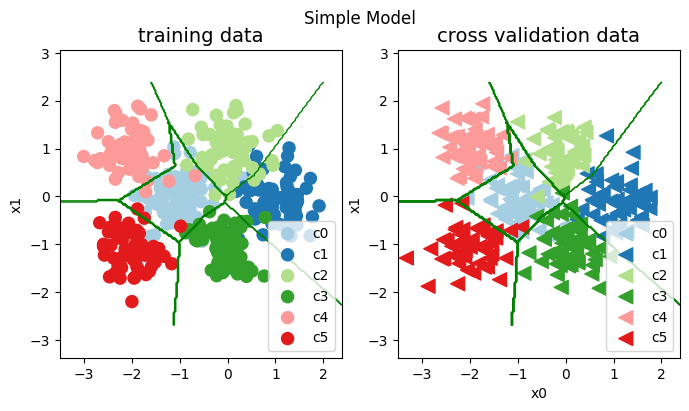

In [15]:

model_predict_s =lambda xl:np.argmax(tf.nn.softmax(model_s.predict(xl)).numpy(),axis=1)
fig,ax =plt.subplots(1,2,figsize=(8,4))
fig.canvas.toolbar_visible=False
fig.canvas.header_visible =False
fig.canvas.footer_visible =False
plot_cat_decision_boundary(ax[0],x_train,model_predict_s,vector =True)
ax[0].set_title("training data",fontsize=14)
plt_mc_data(ax[0],x_train,y_train,classes,legend=True,size=75)
plot_cat_decision_boundary(ax[1],x_train,model_predict_s,vector=True)
ax[1].set_xlabel("x0");ax[0].set_ylabel("x1");
plot_cat_decision_boundary(ax[1],x_train,model_predict_s,vector=True)
ax[1].set_title("cross validation data",fontsize=14)
plt_mc_data(ax[1],x_cv,y_cv,classes,legend =True,size=100,m='<')
ax[1].set_xlabel('x0');ax[1].set_ylabel("x1");
fig.suptitle("Simple Model",fontsize=12)
plt.show()

In [16]:
# let's evaluate model
training_cerr_simple = eval_cat_err(y_train, model_predict_s(x_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(x_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}")
# this one is supposed to be alittle higher from previuse one

10/10 [==============================] - 0s 2ms/step
categorization error, training, simple model, 0.077, complex model: 0.035
categorization error, cv,       simple model, 0.062, complex model: 0.103


In [20]:
# regularization on neural networks
tf.random.set_seed(1234)
model_r =Sequential([
    tf.keras.layers.Dense(120,activation ='relu',kernel_regularizer =tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(40,activation ='relu',kernel_regularizer =tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(6,activation ='linear')
])
model_r.compile(
    loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer =tf.keras.optimizers.Adam(lr =0.01)
)

model_r.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
13/13 [==============================] - 1s 3ms/step - loss: 7.5601
Epoch 2/1000
13/13 [==============================] - 0s 3ms/step - loss: 6.4182
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 5.4738
Epoch 4/1000
13/13 [==============================] - 0s 3ms/step - loss: 4.6929
Epoch 5/1000
13/13 [==============================] - 0s 3ms/step - loss: 4.0554
Epoch 6/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.5302
Epoch 7/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.0996
Epoch 8/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.7458
Epoch 9/1000
13/13 [==============================] - 0s 3ms/step - loss: 2.4543
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 2.2143
Epoch 11/1000
13/13 [==============================] - 0s 2ms/step - loss: 2.0185
Epoch 12/1000
13/13 [==============================] - 0s 3ms/step - loss: 1.8565
Epoch 13/1000
13/13 [====

1082/1082 [==============================] - 2s 2ms/step


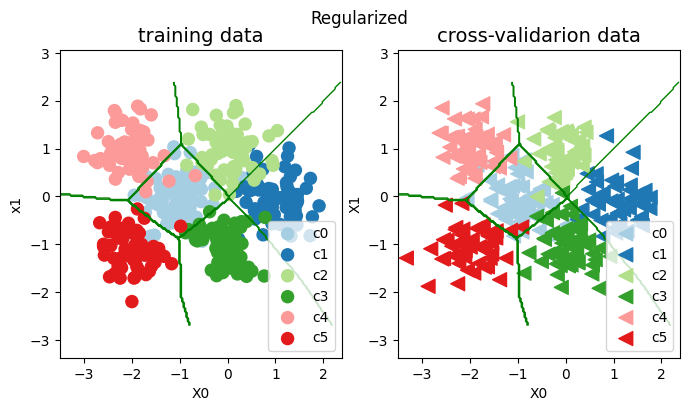

In [24]:
model_predict_r =lambda xl:np.argmax(tf.nn.softmax(model_r.predict(xl)).numpy(),axis=1)

fig,ax =plt.subplots(1,2,figsize=(8,4))
fig.canvas.toolbar_visible =False
fig.canvas.header_visible =False
fig.canvas.footer_visible =False
plot_cat_decision_boundary(ax[0],x_train,model_predict_r,vector=True)
ax[0].set_title("training data",fontsize =14)

plt_mc_data(ax[0],x_train,y_train,classes,legend =True,size=75)
ax[0].set_xlabel("X0");ax[0].set_ylabel("x1");
plot_cat_decision_boundary(ax[1],x_train,model_predict_r,vector=True)
ax[1].set_title("cross-validarion data",fontsize =14)
plt_mc_data(ax[1],x_cv,y_cv,classes,legend=True,size =100,m='<')
ax[1].set_xlabel('X0');ax[1].set_ylabel('X1');
fig.suptitle("Regularized",fontsize=12)
plt.show()

In [27]:
#let' evaluate this model
training_cerr_reg =eval_cat_err(y_train,model_predict_r(x_train))
cv_cerr_reg = eval_cat_err(y_cv,model_predict_r(x_cv))
test_cerr_reg =eval_cat_err(y_test,model_predict_r(x_test))
print(f"categorization error ,training ,regualrized :{training_cerr_reg:0.3f},simple model,{training_cerr_simple:0.3f},complex_model ,{training_cerr_complex}")
print(f"categorization error, training,regularized :{cv_cerr_reg :0.3f},simple model,{cv_cerr_simple:0.3f},complex model {cv_cerr_complex:0.3f}")
#The simple model is a bit better in the training set than the regularized model but it worse in the cross validation set.


3/3 [==============================] - 0s 5ms/step
categorization error ,training ,regualrized :0.070,simple model,0.077,complex_model ,0.035
categorization error, training,regularized :0.069,simple model,0.062,complex model 0.103


In [32]:
#iterate ti find optimal value for regularization
tf.random.set_seed(1234)
lambdas =[0.0,0.001,0.01,0.05,0.1,0.2,0.3]
models =[None]*len(lambdas)
for i in range(len(lambdas)):
  lambda_ =lambdas[i]
  models[i] =Sequential([
      Dense(120,activation ='relu',kernel_regularizer =tf.keras.regularizers.l2(lambda_)),
      Dense(40,activation ='relu',kernel_regularizer =tf.keras.regularizers.l2(lambda_)),
      Dense(classes,activation ='relu')
  ])
  models[i].compile(
    loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits =True),
    optimizer =tf.keras.optimizers.Adam(lr =0.01))
  models[i].fit(
      x_train,y_train,epochs=1000,verbose =0
  )
  print(f"Finished lamda ={lambda_}")


Finished lamda =0.0


Finished lamda =0.001


Finished lamda =0.01


Finished lamda =0.05


Finished lamda =0.1


Finished lamda =0.2
Finished lamda =0.3


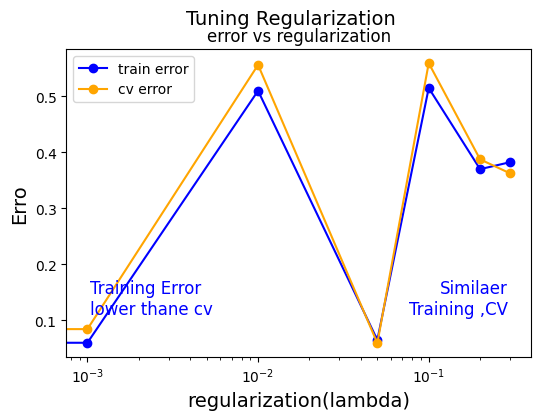

In [39]:
err_train =np.zeros(len(lambdas))
err_cv =np.zeros(len(lambdas))
for i in range(len(models)):
  err_train[i] =eval_cat_err(y_train,np.argmax(models[i](x_train),axis=1))
  err_cv[i] =eval_cat_err(y_cv,np.argmax(models[i](x_cv),axis=1))

fig,ax =plt.subplots(1,1,figsize =(6,4))
fig.canvas.toolbat_visible =False
fig.canvas.header_visible =False
fig.canvas.footer_visible =False
ax.set_title("error vs regularization",fontsize =12)
ax.plot(lambdas,err_train,marker ='o',label ="train error",color ='blue')
ax.plot(lambdas,err_cv,marker ='o',label ="cv error",color ='orange')
ax.set_xscale('log')
ax.set_ylim(*ax.get_ylim())
ax.set_xlabel("regularization(lambda)",fontsize=14)
ax.set_ylabel("Erro",fontsize =14)
ax.legend()
fig.suptitle("Tuning Regularization",fontsize =14)
ax.text(0.05,0.14,"Training Error\nlower thane cv",fontsize =12,ha='left',transform =ax.transAxes,color ='blue')
ax.text(0.95,0.14,"Similaer\nTraining ,CV",fontsize=12,ha='right',transform =ax.transAxes,color ='blue')
plt.show()

#As regularization is increased, the performance of the model on the training and cross-validation data sets converge. For this data set and model, lambda > 0.01 seems to be a reasonable choice.
